In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('df_cs.csv')

In [4]:
df.head() 

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
0,4,3,6,Debit Card,Female,3,3,Super,2,Single,9,1,11,1,5,160,Mobile,1
1,0,1,8,UPI,Male,3,4,Regular Plus,3,Single,7,1,15,0,0,121,Mobile,1
2,0,1,30,Debit Card,Male,2,4,Regular Plus,3,Single,6,1,14,0,3,166,Mobile,1
3,0,3,15,Debit Card,Male,2,4,Super,5,Single,8,0,23,0,3,134,Mobile,1
4,0,1,12,Credit Card,Male,2,3,Regular Plus,5,Single,3,0,11,1,3,130,Mobile,1


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Tenure                   11001 non-null  int64 
 1   City_Tier                11001 non-null  int64 
 2   CC_Contacted_LY          11001 non-null  int64 
 3   Payment                  11001 non-null  object
 4   Gender                   11001 non-null  object
 5   Service_Score            11001 non-null  int64 
 6   Account_user_count       11001 non-null  int64 
 7   account_segment          11001 non-null  object
 8   CC_Agent_Score           11001 non-null  int64 
 9   Marital_Status           11001 non-null  object
 10  rev_per_month            11001 non-null  int64 
 11  Complain_ly              11001 non-null  int64 
 12  rev_growth_yoy           11001 non-null  int64 
 13  coupon_used_for_payment  11001 non-null  int64 
 14  Day_Since_CC_connect     11001 non-nul

In [6]:
df['Payment'].value_counts()

Debit Card          4593
Credit Card         3441
E wallet            1195
Cash on Delivery     977
UPI                  795
Name: Payment, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      6656
Female    4345
Name: Gender, dtype: int64

In [8]:
df['account_segment'].value_counts()

Regular Plus    4111
Super           3961
HNI             1615
Super Plus       803
Regular          511
Name: account_segment, dtype: int64

In [517]:
df['Marital_Status'].value_counts()

Married     5921
Single      3412
Divorced    1668
Name: Marital_Status, dtype: int64

In [9]:
df['Churn'].value_counts(normalize = True)

0    0.831652
1    0.168348
Name: Churn, dtype: float64

In [10]:
df1=df.copy()

In [11]:
replaceStruct= {"account_segment" : {"Regular" :1,"Regular Plus":2,"Super":3,"Super Plus":4,"HNI":5}}

In [12]:
oneHOTcols=["Payment","Gender","Marital_Status","Login_device"]

In [13]:
df1=df1.replace(replaceStruct)
df1=pd.get_dummies(df1,columns=oneHOTcols)
df1.head(10)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others
0,4,3,6,3,3,3,2,9,1,11,...,0,0,1,0,0,0,1,0,1,0
1,0,1,8,3,4,2,3,7,1,15,...,0,1,0,1,0,0,1,0,1,0
2,0,1,30,2,4,2,3,6,1,14,...,0,0,0,1,0,0,1,0,1,0
3,0,3,15,2,4,3,5,8,0,23,...,0,0,0,1,0,0,1,0,1,0
4,0,1,12,2,3,2,5,3,0,11,...,0,0,0,1,0,0,1,0,1,0
5,0,1,22,3,4,2,5,2,1,22,...,0,0,1,0,0,0,1,1,0,0
6,2,3,11,2,3,3,2,4,0,14,...,0,0,0,1,1,0,0,0,1,0
7,0,1,6,3,3,2,2,3,1,16,...,0,0,0,1,1,0,0,0,1,0
8,13,3,9,2,4,2,3,2,1,14,...,1,0,0,1,1,0,0,0,1,0
9,0,1,31,2,5,2,3,2,0,12,...,0,0,0,1,0,0,1,0,1,0


# Basic Logistic Regression

In [16]:
X = df1.drop("Churn", axis=1)

y = df1.pop("Churn")

In [17]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.30 , random_state=1)

In [18]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (7700, 26)
X_test (3301, 26)
train_labels (7700,)
test_labels (3301,)


In [518]:
X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others
7345,1,2,16,3,4,2,1,2,0,15,...,0,0,0,1,0,1,0,0,1,0
4178,27,3,13,3,4,3,3,4,1,21,...,1,0,0,1,0,1,0,0,1,0
1616,28,1,26,2,3,3,1,4,1,19,...,0,0,0,1,0,1,0,0,1,0
2775,19,3,13,3,5,5,2,8,0,13,...,0,0,1,0,0,0,1,1,0,0
10273,37,1,22,4,4,2,1,9,0,19,...,0,0,0,1,0,1,0,0,1,0


In [519]:
X_test.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others
3380,3,1,17,4,4,2,4,2,0,15,...,0,0,1,0,0,1,0,1,0,0
10114,8,3,22,4,4,3,5,10,0,18,...,0,0,1,0,0,1,0,0,1,0
8577,1,1,17,3,3,2,5,5,0,17,...,0,0,0,1,1,0,0,0,1,0
7617,21,1,14,3,3,2,4,4,0,12,...,0,0,0,1,0,0,1,0,0,1
9229,1,1,11,3,4,2,1,5,1,16,...,0,0,1,0,0,0,1,1,0,0


In [520]:
train_labels.head()

7345     0
4178     0
1616     0
2775     0
10273    0
Name: Churn, dtype: int64

In [521]:
test_labels.head()

3380     0
10114    0
8577     0
7617     0
9229     0
Name: Churn, dtype: int64

In [20]:
log = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
log.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   18.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

## Log Training data

In [21]:
ytrain_predict_log = log.predict(X_train)
ytest_predict_log = log.predict(X_test)

In [22]:
log.score(X_train, train_labels)

0.8805194805194805

In [23]:
ytest_predict_log_prob=log.predict_proba(X_test)
ytest_predict_log_prob
pd.DataFrame(ytest_predict_log_prob).head()

,0,1
0,0.868375,0.131625
1,0.848619,0.151381
2,0.815205,0.184795
3,0.978423,0.021577
4,0.290192,0.709808


In [29]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [27]:
confusion_matrix(train_labels, ytrain_predict_log)

array([[6191,  215],
       [ 705,  589]], dtype=int64)

Text(0.5, 1.0, 'Train Data Log Reg')

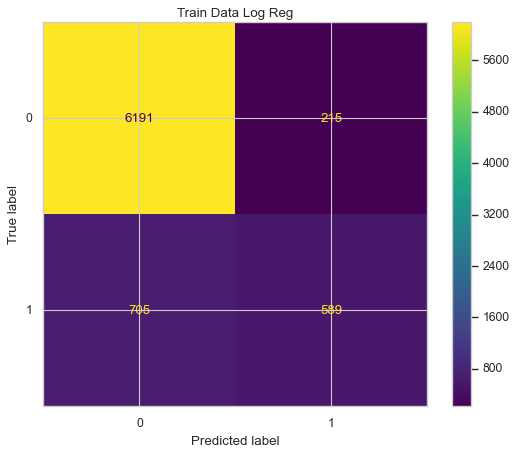

In [30]:
plot_confusion_matrix(log,X_train,train_labels);
plt.title('Train Data Log Reg')

AUC: 0.873


Text(0.5, 1.0, 'Train Data-Log')

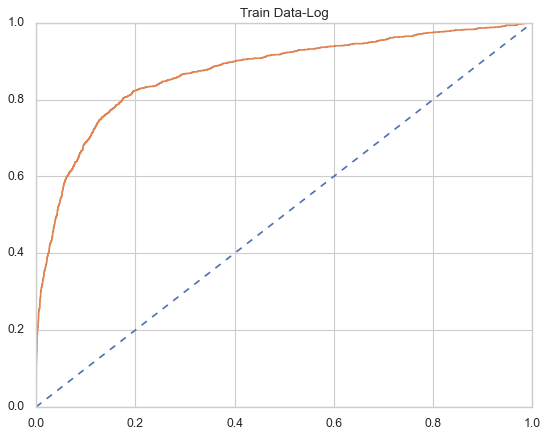

In [31]:
# predict probabilities
probs = log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);
plt.title('Train Data-Log')

In [33]:
#Log Testing data

In [34]:
log.score(X_test, test_labels)

0.8788245986064829

In [35]:
confusion_matrix(test_labels, ytest_predict_log)

array([[2650,   93],
       [ 307,  251]], dtype=int64)

Text(0.5, 1.0, 'Test Data Log Reg')

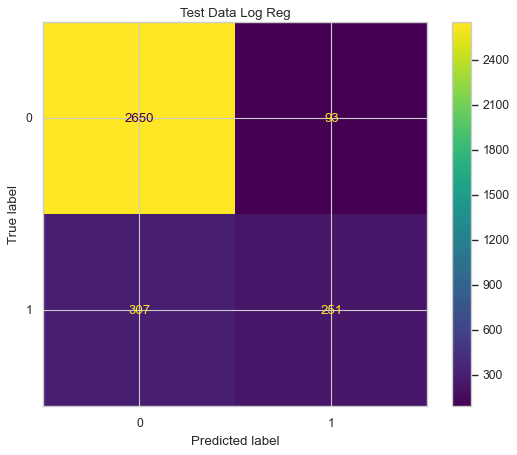

In [36]:
plot_confusion_matrix(log,X_test,test_labels);
plt.title('Test Data Log Reg')

AUC: 0.859


Text(0.5, 1.0, 'Test Data-Log')

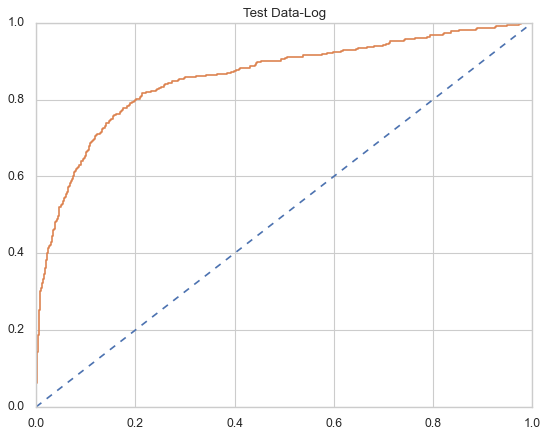

In [37]:
# predict probabilities
probs = log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);
plt.title('Test Data-Log')

In [46]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels, ytrain_predict_log),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels, ytest_predict_log),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6406
           1       0.73      0.46      0.56      1294

    accuracy                           0.88      7700
   macro avg       0.82      0.71      0.75      7700
weighted avg       0.87      0.88      0.87      7700
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2743
           1       0.73      0.45      0.56       558

    accuracy                           0.88      3301
   macro avg       0.81      0.71      0.74      3301
weighted avg       0.87      0.88      0.87      3301
 



In [68]:
## Oversample using SMOTE

In [69]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_train_res, train_labels_res = sm.fit_resample(X_train, train_labels)

## Applying GridSearchCV for Logistic Regression

In [48]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [49]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [52]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [70]:
grid_search.fit(X_train_res, train_labels_res)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [71]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none')


In [72]:
gs_log = grid_search.best_estimator_

In [73]:
ytrain_predict_gs_log = gs_log.predict(X_train_res)
ytest_predict_gs_log = gs_log.predict(X_test)

### Train data

In [74]:
gs_log.score(X_train_res, train_labels_res)

0.8911177021542304

In [75]:
confusion_matrix(train_labels_res, ytrain_predict_gs_log)

array([[5966,  440],
       [ 955, 5451]], dtype=int64)

Text(0.5, 1.0, 'Train Data Log Reg -GridSearch')

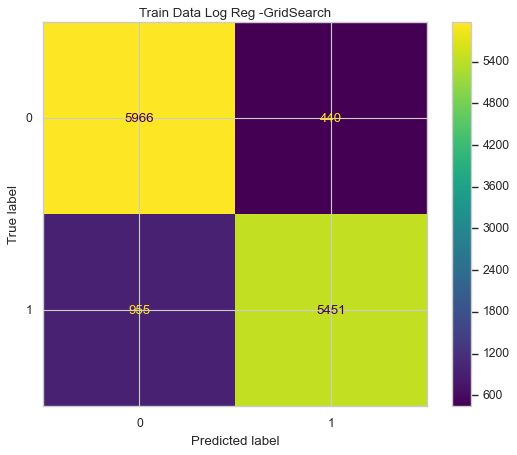

In [105]:
plot_confusion_matrix(gs_log,X_train_res,train_labels_res);
plt.title('Train Data Log Reg -GridSearch')

AUC: 0.953


Text(0.5, 1.0, 'Train Data Log Reg -GridSearch')

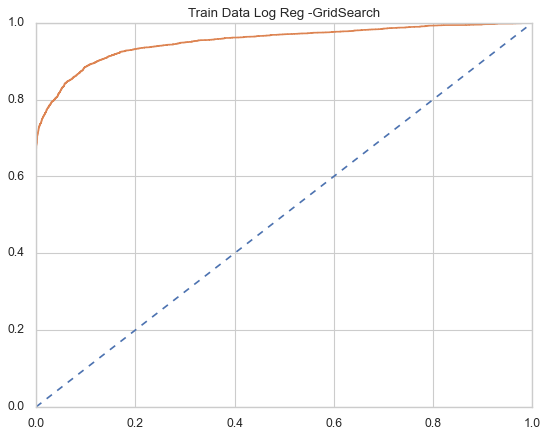

In [107]:
# predict probabilities
probs = gs_log.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_log_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % gs_log_train_auc)
# calculate roc curve
gs_log_train_fpr, gs_log_train_tpr, gs_log_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_log_train_fpr, gs_log_train_tpr);
plt.title('Train Data Log Reg -GridSearch')

## Test data

In [77]:
gs_log.score(X_test, test_labels)

0.8700393820054529

In [78]:
confusion_matrix(test_labels, ytest_predict_gs_log)

array([[2531,  212],
       [ 217,  341]], dtype=int64)

Text(0.5, 1.0, 'Test Data Log Reg -GridSearch')

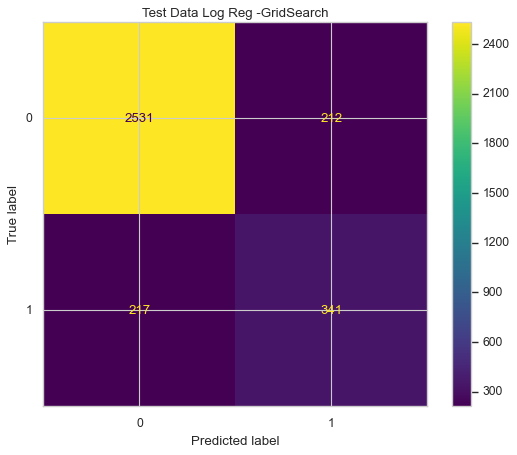

In [108]:
plot_confusion_matrix(gs_log,X_test,test_labels);
plt.title('Test Data Log Reg -GridSearch')

AUC: 0.857


Text(0.5, 1.0, 'Test Data-Log-GridSearch')

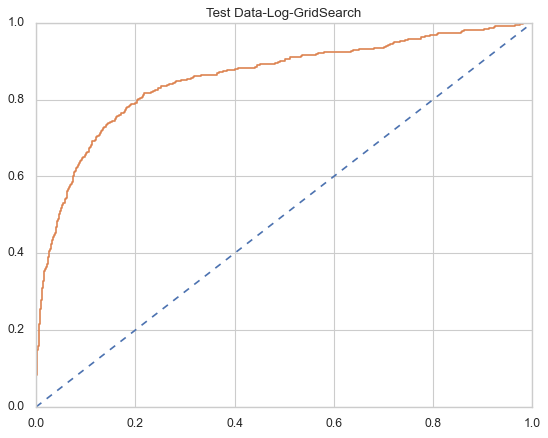

In [109]:
# predict probabilities
probs = gs_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gs_log_test_auc)
# calculate roc curve
gs_log_test_fpr, gs_log_test_tpr, gs_log_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_log_test_fpr, gs_log_test_tpr);
plt.title('Test Data-Log-GridSearch')

In [110]:
print('Classification Report of the training data GS-Log:\n\n',metrics.classification_report(train_labels_res, ytrain_predict_gs_log),'\n')
print('Classification Report of the test data GS-Log:\n\n',metrics.classification_report(test_labels, ytest_predict_gs_log),'\n')

Classification Report of the training data GS-Log:

               precision    recall  f1-score   support

           0       0.86      0.93      0.90      6406
           1       0.93      0.85      0.89      6406

    accuracy                           0.89     12812
   macro avg       0.89      0.89      0.89     12812
weighted avg       0.89      0.89      0.89     12812
 

Classification Report of the test data GS-Log:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2743
           1       0.62      0.61      0.61       558

    accuracy                           0.87      3301
   macro avg       0.77      0.77      0.77      3301
weighted avg       0.87      0.87      0.87      3301
 



In [522]:
for idx, col_name in enumerate(X_train_res.columns):
    print("The coefficient for {} is {}".format(col_name, gs_log.coef_[0][idx]))

The coefficient for Tenure is -0.18122868225864117
The coefficient for City_Tier is 0.13097066760468926
The coefficient for CC_Contacted_LY is 0.02233791790544355
The coefficient for Service_Score is -0.18453380984244705
The coefficient for Account_user_count is 0.29939399554147533
The coefficient for account_segment is -0.08629596691561105
The coefficient for CC_Agent_Score is 0.20850700675670972
The coefficient for rev_per_month is 0.1161142133570578
The coefficient for Complain_ly is 1.4795057835870102
The coefficient for rev_growth_yoy is -0.039508270891358666
The coefficient for coupon_used_for_payment is 0.11122551679580876
The coefficient for Day_Since_CC_connect is -0.05598044707942025
The coefficient for cashback is 0.0005063788072052815
The coefficient for Payment_Cash on Delivery is -11.385039234120862
The coefficient for Payment_Credit Card is -12.099757612205762
The coefficient for Payment_Debit Card is -11.78281862470355
The coefficient for Payment_E wallet is -11.3319851

# Stats Model Logistic Regression

In [112]:
import statsmodels.formula.api as SM

In [117]:
df2=df1.copy()

In [121]:
df2=pd.concat([X, y], axis = 1)

In [122]:
X1 = df2.drop("Churn", axis=1)
y1 = df2.pop("Churn")

In [123]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X1, y1 = sm.fit_resample(X1,y1)

<AxesSubplot:xlabel='Churn', ylabel='count'>

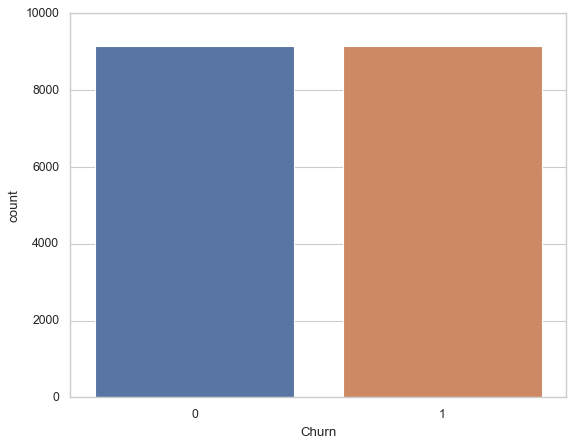

In [530]:
sns.countplot(x="Churn", data=df3)

In [124]:
df3=pd.concat([X1, y1], axis = 1)

In [127]:
df3.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_UPI,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others,Churn
0,4,3,6,3,3,3,2,9,1,11,...,0,1,0,0,0,1,0,1,0,1
1,0,1,8,3,4,2,3,7,1,15,...,1,0,1,0,0,1,0,1,0,1
2,0,1,30,2,4,2,3,6,1,14,...,0,0,1,0,0,1,0,1,0,1
3,0,3,15,2,4,3,5,8,0,23,...,0,0,1,0,0,1,0,1,0,1
4,0,1,12,2,3,2,5,3,0,11,...,0,0,1,0,0,1,0,1,0,1


In [128]:
df3.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'account_segment', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Payment_Cash on Delivery', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Female', 'Gender_Male',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_device_Computer', 'Login_device_Mobile',
       'Login_device_Others', 'Churn'],
      dtype='object')

In [226]:
df3.to_csv('df33.csv')

In [167]:
lg=pd.read_csv('df33.csv')

In [168]:
lg.columns

Index(['Tenure', 'citytier', 'cccontactedly', 'servicescore',
       'accountusercount', 'accountsegment', 'ccagentscore', 'revpermonth',
       'complianly', 'revgrowthyoy', 'couponusedforpayment',
       'daysinceccconect', 'cashback', 'paymentcashondelivery',
       'paymentcreditcard', 'paymentdebitcard', 'paymentewallet', 'paymentupi',
       'genderfemale', 'gendermale', 'maritalstatusdivorced',
       'maritalstatusmarried', 'maritalstatussingle', 'logindevicecomputer',
       'logindevicemobiles', 'logindeviceothers', 'churn'],
      dtype='object')

In [169]:
'churn~ Tenure+citytier+cccontactedly+servicescore+accountusercount+accountsegment+ccagentscore+revpermonth+complianly+revgrowthyoy+couponusedforpayment+daysinceccconect+cashback+paymentcashondelivery+paymentcreditcard+paymentdebitcard+paymentewallet+paymentupi+genderfemale+gendermale+maritalstatusdivorced+maritalstatusmarried+maritalstatussingle+logindevicecomputer+logindevicemobiles+logindeviceothers'

'churn~ Tenure+citytier+cccontactedly+servicescore+accountusercount+accountsegment+ccagentscore+revpermonth+complianly+revgrowthyoy+couponusedforpayment+daysinceccconect+cashback+paymentcashondelivery+paymentcreditcard+paymentdebitcard+paymentewallet+paymentupi+genderfemale+gendermale+maritalstatusdivorced+maritalstatusmarried+maritalstatussingle+logindevicecomputer+logindevicemobiles+logindeviceothers'

In [170]:
f_1 = 'churn~ Tenure + citytier + cccontactedly + servicescore + accountusercount + accountsegment + ccagentscore + revpermonth + complianly + revgrowthyoy + couponusedforpayment + daysinceccconect + cashback + paymentcashondelivery + paymentcreditcard + paymentdebitcard +paymentewallet+paymentupi+genderfemale+gendermale+maritalstatusdivorced+maritalstatusmarried+maritalstatussingle+logindevicecomputer+logindevicemobiles+logindeviceothers'

In [171]:
model_1 = SM.logit(formula = f_1, data=lg).fit()

         Current function value: 0.284581
         Iterations: 35


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [172]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                18298
Model:                          Logit   Df Residuals:                    18271
Method:                           MLE   Df Model:                           26
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.5894
Time:                        17:03:28   Log-Likelihood:                -5207.3
converged:                      False   LL-Null:                       -12683.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                87.1936   5265.195      0.017      0.987   -1.02e+04    1.04e+04
Tenure                   -0.1673      0.005    -35.631      0.000      -0.177      -0.158
citytier                  0.1766      0.031      5.738      0.000       0.116       0.237
cccontactedly             0.0190      0.003      6.626      0.000       0.013       0.025
servicescore             -0.1983      0.037     -5.325      0.000      -0.271      -0.125
accountusercount          0.3164      0.027     11.855      0.000       0.264       0.369
accountsegment           -0.1318      0.027     -4.832      0.000      -0.185      -0.078
ccagentscore              0.2130      0.018     11.766      0.000       0.177       0.248
revpermonth               0.1211      0.009     13.996      0.000       0.104       0.138
complianly                1.4795      0.052     28.379      0.000       1.377       1.582
revgrowthyoy             -0.0414      0.007     -6.147      0.000      -0.055      -0.028
couponusedforpayment      0.1233      0.014      8.674      0.000       0.095       0.151
daysinceccconect         -0.0573      0.008     -6.932      0.000      -0.074      -0.041
cashback                  0.0028      0.001      3.469      0.001       0.001       0.004
paymentcashondelivery   -23.3614   2020.139     -0.012      0.991   -3982.761    3936.038
paymentcreditcard       -24.0985   2020.139     -0.012      0.990   -3983.498    3935.301
paymentdebitcard        -23.9126   2020.139     -0.012      0.991   -3983.312    3935.487
paymentewallet          -23.4673   2020.139     -0.012      0.991   -3982.866    3935.932
paymentupi              -24.0835   2020.139     -0.012      0.990   -3983.483    3935.316
genderfemale            -21.2318   3065.225     -0.007      0.994   -6028.963    5986.499
gendermale              -20.8878   3065.225     -0.007      0.995   -6028.619    5986.843
maritalstatusdivorced   -21.9165    568.768     -0.039      0.969   -1136.682    1092.849
maritalstatusmarried    -21.7675    568.768     -0.038      0.969   -1136.533    1092.998
maritalstatussingle     -20.7405    568.768     -0.036      0.971   -1135.506    1094.025
logindevicecomputer     -22.9456   3731.281     -0.006      0.995   -7336.121    7290.230
logindevicemobiles      -23.2808   3731.281     -0.006      0.995   -7336.456    7289.895
logindeviceothers       -23.8958   3731.281     -0.006      0.995   -7337.071    7289.280
=========================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [173]:
#### Checking the Variance Inflation Factor

In [188]:
VF=lg.drop('churn', axis = 1)

In [189]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(VF):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = VF.columns
    vif["VIF"] = [variance_inflation_factor(VF.values, i) for i in range(VF.shape[1])]

    return(vif)

In [190]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,cashback,25.078340
3,servicescore,20.802799
4,accountusercount,16.998240
9,revgrowthyoy,16.668210
5,accountsegment,10.052510
19,gendermale,7.875016
24,logindevicemobiles,6.934228
6,ccagentscore,6.085119
1,citytier,5.924228
2,cccontactedly,5.450321


In [191]:
VF=VF.drop('cashback', axis = 1)

In [192]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,servicescore,20.261196
9,revgrowthyoy,16.459691
4,accountusercount,16.335264
5,accountsegment,8.782594
18,gendermale,7.806485
23,logindevicemobiles,6.890287
6,ccagentscore,6.019874
1,citytier,5.845604
2,cccontactedly,5.435432
17,genderfemale,5.214490


In [193]:
VF=VF.drop('servicescore', axis = 1)

In [194]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,revgrowthyoy,15.607609
3,accountusercount,13.268882
4,accountsegment,8.769733
17,gendermale,7.791299
22,logindevicemobiles,6.869349
5,ccagentscore,5.897060
1,citytier,5.836016
2,cccontactedly,5.384613
16,genderfemale,5.205080
19,maritalstatusmarried,4.645521


In [195]:
VF=VF.drop('revgrowthyoy', axis = 1)

In [196]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,accountusercount,11.716452
4,accountsegment,8.702684
16,gendermale,7.638631
21,logindevicemobiles,6.833955
1,citytier,5.782752
5,ccagentscore,5.627440
15,genderfemale,5.127056
2,cccontactedly,5.079122
18,maritalstatusmarried,4.610378
6,revpermonth,4.358270


In [197]:
VF=VF.drop('accountusercount', axis = 1)

In [198]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,accountsegment,8.567357
15,gendermale,7.408168
20,logindevicemobiles,6.637074
1,citytier,5.615153
4,ccagentscore,5.403469
14,genderfemale,5.009101
2,cccontactedly,4.890540
17,maritalstatusmarried,4.606578
5,revpermonth,4.161569
11,paymentdebitcard,4.155733


In [199]:
VF=VF.drop('accountsegment', axis = 1)

In [200]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,gendermale,7.319407
19,logindevicemobiles,6.591654
3,ccagentscore,5.359363
1,citytier,5.136712
13,genderfemale,4.953761
2,cccontactedly,4.639148
16,maritalstatusmarried,4.598070
10,paymentdebitcard,4.150942
4,revpermonth,4.083166
17,maritalstatussingle,3.439043


In [201]:
VF=VF.drop('gendermale', axis = 1)

In [202]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,logindevicemobiles,6.380664
3,ccagentscore,5.286041
1,citytier,4.955553
2,cccontactedly,4.526075
15,maritalstatusmarried,4.387751
4,revpermonth,4.049357
10,paymentdebitcard,3.908175
16,maritalstatussingle,3.300302
9,paymentcreditcard,3.187727
17,logindevicecomputer,3.126107


In [203]:
VF=VF.drop('logindevicemobiles', axis = 1)

In [204]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ccagentscore,5.175304
1,citytier,4.856049
2,cccontactedly,4.433896
15,maritalstatusmarried,4.215876
4,revpermonth,4.006456
10,paymentdebitcard,3.511467
16,maritalstatussingle,3.207470
7,daysinceccconect,2.866358
9,paymentcreditcard,2.865699
6,couponusedforpayment,2.171523


In [205]:
VF=VF.drop('ccagentscore', axis = 1)

In [206]:
calc_vif(VF).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,citytier,4.659037
14,maritalstatusmarried,4.149856
2,cccontactedly,4.136969
3,revpermonth,3.783482
9,paymentdebitcard,3.484403
15,maritalstatussingle,3.125059
6,daysinceccconect,2.854073
8,paymentcreditcard,2.837336
5,couponusedforpayment,2.170382
0,Tenure,2.131169


In [208]:
y1 = lg['churn']

In [209]:
VF_train, VF_test, y1_train, y1_test = train_test_split(VF,y1, test_size = 0.3, random_state = 1)

In [210]:
Default_train = pd.concat([VF_train, y1_train], axis = 1)
Default_test = pd.concat([VF_test, y1_test], axis = 1)

In [ ]:
## Model 2

In [211]:
f_2 = 'churn~ Tenure + citytier + cccontactedly + revpermonth + complianly + couponusedforpayment + daysinceccconect + paymentcashondelivery + paymentcreditcard + paymentdebitcard + paymentewallet + paymentupi + genderfemale + maritalstatusdivorced + maritalstatusmarried + maritalstatussingle + logindevicecomputer+ logindeviceothers'

In [212]:
model_2 = SM.logit(formula = f_2, data=Default_train).fit()

         Current function value: 0.318473
         Iterations: 35


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [213]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                12808
Model:                          Logit   Df Residuals:                    12789
Method:                           MLE   Df Model:                           18
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.5405
Time:                        17:35:15   Log-Likelihood:                -4079.0
converged:                      False   LL-Null:                       -8877.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.3667    805.348      0.051      0.959   -1537.086    1619.819
Tenure                   -0.1707      0.005    -33.416      0.000      -0.181      -0.161
citytier                  0.1219      0.034      3.551      0.000       0.055       0.189
cccontactedly             0.0151      0.003      4.721      0.000       0.009       0.021
revpermonth               0.1182      0.010     12.315      0.000       0.099       0.137
complianly                1.3714      0.059     23.060      0.000       1.255       1.488
couponusedforpayment      0.1231      0.016      7.750      0.000       0.092       0.154
daysinceccconect         -0.0570      0.009     -6.318      0.000      -0.075      -0.039
paymentcashondelivery   -21.8307    764.707     -0.029      0.977   -1520.629    1476.968
paymentcreditcard       -22.5280    764.707     -0.029      0.976   -1521.326    1476.270
paymentdebitcard        -22.3609    764.707     -0.029      0.977   -1521.159    1476.437
paymentewallet          -21.7649    764.707     -0.028      0.977   -1520.563    1477.034
paymentupi              -22.6916    764.707     -0.030      0.976   -1521.490    1476.107
genderfemale             -0.4333      0.058     -7.436      0.000      -0.548      -0.319
maritalstatusdivorced   -20.6591    252.602     -0.082      0.935    -515.750     474.432
maritalstatusmarried    -20.4653    252.602     -0.081      0.935    -515.556     474.626
maritalstatussingle     -19.3790    252.602     -0.077      0.939    -514.470     475.712
logindevicecomputer       0.1800      0.062      2.892      0.004       0.058       0.302
logindeviceothers        -0.9748      0.173     -5.622      0.000      -1.315      -0.635
=========================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
## Model 3

In [214]:
f_3 = 'churn~ Tenure + citytier + cccontactedly + revpermonth + complianly + couponusedforpayment + daysinceccconect + paymentcreditcard + paymentdebitcard + paymentewallet + paymentupi + genderfemale + maritalstatusdivorced + maritalstatusmarried + maritalstatussingle + logindevicecomputer+ logindeviceothers'

In [215]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

         Current function value: 0.349852
         Iterations: 35


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [216]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                12808
Model:                          Logit   Df Residuals:                    12790
Method:                           MLE   Df Model:                           17
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.4953
Time:                        17:39:23   Log-Likelihood:                -4480.9
converged:                      False   LL-Null:                       -8877.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                26.2194   3715.108      0.007      0.994   -7255.259    7307.698
Tenure                   -0.1587      0.005    -34.650      0.000      -0.168      -0.150
citytier                  0.1409      0.033      4.284      0.000       0.076       0.205
cccontactedly             0.0153      0.003      4.970      0.000       0.009       0.021
revpermonth               0.1080      0.009     11.637      0.000       0.090       0.126
complianly                1.2813      0.058     22.027      0.000       1.167       1.395
couponusedforpayment      0.1068      0.015      6.919      0.000       0.077       0.137
daysinceccconect         -0.0724      0.009     -8.157      0.000      -0.090      -0.055
paymentcreditcard        -2.0284      0.084    -24.210      0.000      -2.193      -1.864
paymentdebitcard         -1.8639      0.079    -23.528      0.000      -2.019      -1.709
paymentewallet           -1.3170      0.113    -11.693      0.000      -1.538      -1.096
paymentupi               -2.1875      0.123    -17.747      0.000      -2.429      -1.946
genderfemale             -0.5084      0.056     -9.032      0.000      -0.619      -0.398
maritalstatusdivorced   -25.9509   3715.108     -0.007      0.994   -7307.429    7255.528
maritalstatusmarried    -25.6651   3715.108     -0.007      0.994   -7307.143    7255.813
maritalstatussingle     -24.5823   3715.108     -0.007      0.995   -7306.061    7256.896
logindevicecomputer       0.0564      0.061      0.925      0.355      -0.063       0.176
logindeviceothers        -1.1340      0.172     -6.580      0.000      -1.472      -0.796
=========================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [217]:
## Model 4

In [218]:
f_4 = 'churn~ Tenure + citytier + cccontactedly + revpermonth + complianly + couponusedforpayment + daysinceccconect + paymentcreditcard + paymentdebitcard + paymentewallet + paymentupi + genderfemale + maritalstatusmarried + maritalstatussingle + logindevicecomputer+ logindeviceothers'

In [219]:
model_4 = SM.logit(formula = f_4, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.416611
         Iterations 7


In [220]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                12808
Model:                          Logit   Df Residuals:                    12791
Method:                           MLE   Df Model:                           16
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.3989
Time:                        17:40:54   Log-Likelihood:                -5336.0
converged:                       True   LL-Null:                       -8877.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4703      0.111     22.349      0.000       2.254       2.687
Tenure                  -0.1449      0.004    -37.625      0.000      -0.152      -0.137
citytier                 0.1165      0.031      3.793      0.000       0.056       0.177
cccontactedly            0.0174      0.003      6.202      0.000       0.012       0.023
revpermonth              0.0941      0.009     11.045      0.000       0.077       0.111
complianly               1.1554      0.054     21.428      0.000       1.050       1.261
couponusedforpayment     0.0973      0.014      6.878      0.000       0.070       0.125
daysinceccconect        -0.0784      0.008     -9.750      0.000      -0.094      -0.063
paymentcreditcard       -2.2741      0.077    -29.642      0.000      -2.424      -2.124
paymentdebitcard        -2.1039      0.072    -29.162      0.000      -2.245      -1.963
paymentewallet          -1.5900      0.104    -15.334      0.000      -1.793      -1.387
paymentupi              -2.5213      0.116    -21.801      0.000      -2.748      -2.295
genderfemale            -0.5099      0.052     -9.883      0.000      -0.611      -0.409
maritalstatusmarried    -1.5814      0.063    -24.934      0.000      -1.706      -1.457
maritalstatussingle     -0.5058      0.064     -7.860      0.000      -0.632      -0.380
logindevicecomputer     -0.0944      0.058     -1.642      0.101      -0.207       0.018
logindeviceothers       -1.2920      0.165     -7.810      0.000      -1.616      -0.968
========================================================================================
"""

In [221]:
## Model 5

In [222]:
f_5 = 'churn~ Tenure + citytier + cccontactedly + revpermonth + complianly + couponusedforpayment + daysinceccconect + paymentcreditcard + paymentdebitcard + paymentewallet + paymentupi + genderfemale + maritalstatusmarried + maritalstatussingle + logindeviceothers'

In [223]:
model_5 = SM.logit(formula = f_5, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.416716
         Iterations 7


In [224]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                12808
Model:                          Logit   Df Residuals:                    12792
Method:                           MLE   Df Model:                           15
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.3988
Time:                        17:43:51   Log-Likelihood:                -5337.3
converged:                       True   LL-Null:                       -8877.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4622      0.110     22.304      0.000       2.246       2.679
Tenure                  -0.1448      0.004    -37.609      0.000      -0.152      -0.137
citytier                 0.1158      0.031      3.770      0.000       0.056       0.176
cccontactedly            0.0172      0.003      6.160      0.000       0.012       0.023
revpermonth              0.0947      0.009     11.114      0.000       0.078       0.111
complianly               1.1544      0.054     21.416      0.000       1.049       1.260
couponusedforpayment     0.0968      0.014      6.845      0.000       0.069       0.124
daysinceccconect        -0.0787      0.008     -9.781      0.000      -0.094      -0.063
paymentcreditcard       -2.2787      0.077    -29.717      0.000      -2.429      -2.128
paymentdebitcard        -2.1130      0.072    -29.358      0.000      -2.254      -1.972
paymentewallet          -1.5896      0.104    -15.327      0.000      -1.793      -1.386
paymentupi              -2.5298      0.116    -21.893      0.000      -2.756      -2.303
genderfemale            -0.5133      0.052     -9.954      0.000      -0.614      -0.412
maritalstatusmarried    -1.5899      0.063    -25.151      0.000      -1.714      -1.466
maritalstatussingle     -0.5120      0.064     -7.972      0.000      -0.638      -0.386
logindeviceothers       -1.2682      0.165     -7.693      0.000      -1.591      -0.945
========================================================================================
"""

In [239]:
Default_train.head()

,Tenure,citytier,cccontactedly,revpermonth,complianly,couponusedforpayment,daysinceccconect,paymentcashondelivery,paymentcreditcard,paymentdebitcard,paymentewallet,paymentupi,genderfemale,maritalstatusdivorced,maritalstatusmarried,maritalstatussingle,logindevicecomputer,logindeviceothers,churn
10562,10,3,21,10,0,5,4,0,0,0,1,0,0,0,1,0,0,0,1
15768,0,2,15,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3290,1,1,9,3,0,2,4,0,1,0,0,0,0,1,0,0,0,0,0
15081,0,1,15,2,0,0,2,0,0,0,0,0,1,1,0,0,0,0,1
4504,1,3,29,3,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0


In [227]:
y_prob_pred_train = model_5.predict(Default_train)

In [228]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [229]:
y_prob_pred_test = model_5.predict(Default_test)

In [230]:
y_class_pred1=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred1.append(a)

In [ ]:
##Train data

Text(0.5, 1.0, 'Train Data Log Reg -Statsmodel')

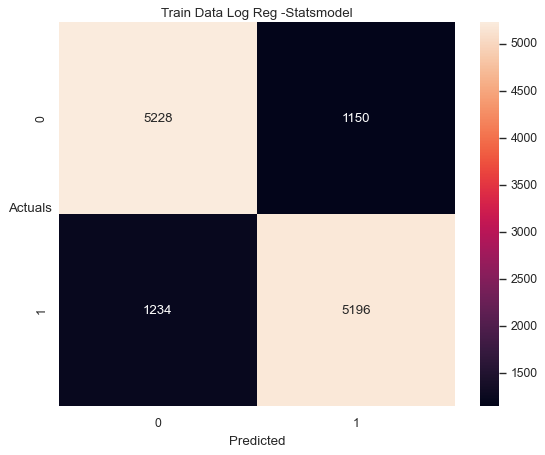

In [243]:
sns.heatmap((metrics.confusion_matrix(Default_train['churn'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0)
plt.title('Train Data Log Reg -Statsmodel')

In [ ]:
##Test data

Text(0.5, 1.0, 'Test Data Log Reg -Statsmodel')

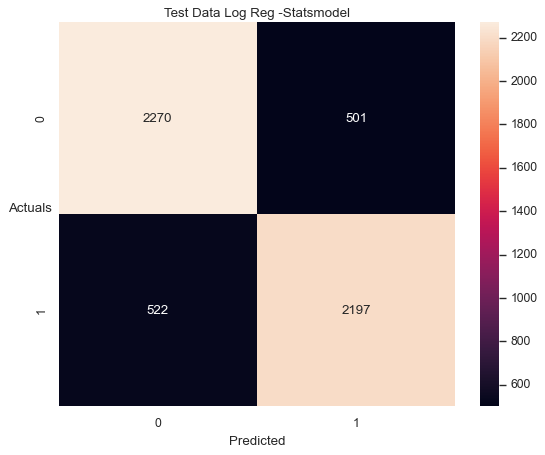

In [246]:
sns.heatmap((metrics.confusion_matrix(Default_test['churn'],y_class_pred1)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0)
plt.title('Test Data Log Reg -Statsmodel')

In [ ]:
##Train and Test data with 0.5 cutoff

In [231]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Default_train['churn'], y_class_pred),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Default_test['churn'], y_class_pred1),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.82      0.81      6378
           1       0.82      0.81      0.81      6430

    accuracy                           0.81     12808
   macro avg       0.81      0.81      0.81     12808
weighted avg       0.81      0.81      0.81     12808
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.82      0.82      2771
           1       0.81      0.81      0.81      2719

    accuracy                           0.81      5490
   macro avg       0.81      0.81      0.81      5490
weighted avg       0.81      0.81      0.81      5490
 



## Choosing the optimal threshold

In [234]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['churn'],y_prob_pred_train)

In [235]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5353640062994468

In [ ]:
#### Validating on the train set with revised threshold

In [236]:
y_class_pred11=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.53:
        a=1
    else:
        a=0
    y_class_pred11.append(a)

In [ ]:
#### Validating on the test set with revised threshold

In [237]:
y_class_pred12=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred12.append(a)

In [238]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Default_train['churn'], y_class_pred11),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Default_test['churn'], y_class_pred12),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.84      0.82      6378
           1       0.83      0.79      0.81      6430

    accuracy                           0.82     12808
   macro avg       0.82      0.82      0.82     12808
weighted avg       0.82      0.82      0.82     12808
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.81      0.82      0.82      2771
           1       0.81      0.81      0.81      2719

    accuracy                           0.81      5490
   macro avg       0.81      0.81      0.81      5490
weighted avg       0.81      0.81      0.81      5490
 



## Linear Discriminant analysis

In [247]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [248]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, train_labels)

LinearDiscriminantAnalysis()

In [ ]:
###LDA Training data

In [249]:
ytrain_predict_lda = lda.predict(X_train)
ytest_predict_lda = lda.predict(X_test)

In [250]:
confusion_matrix(train_labels, ytrain_predict_lda)        

array([[6197,  209],
       [ 738,  556]], dtype=int64)

Text(0.5, 1.0, 'Train Data LDA Reg')

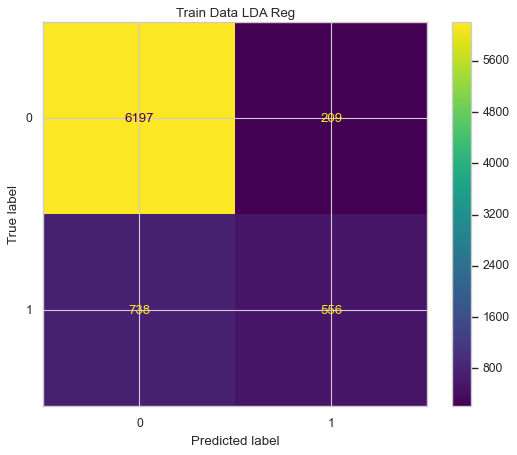

In [251]:
plot_confusion_matrix(lda,X_train,train_labels);
plt.title('Train Data LDA Reg')

AUC: 0.863


Text(0.5, 1.0, 'Train Data-LDA')

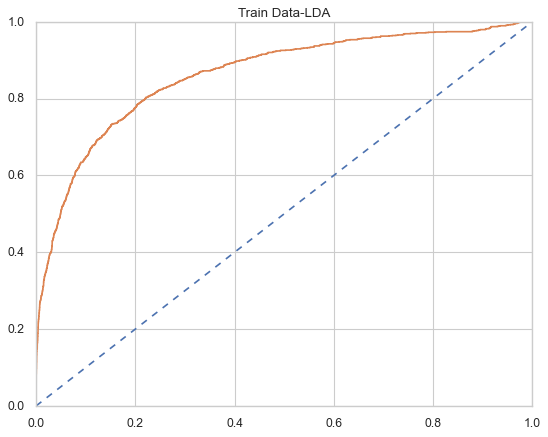

In [252]:
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);
plt.title('Train Data-LDA')

In [ ]:
###LDA Testing data

In [253]:
confusion_matrix(test_labels, ytest_predict_lda)

array([[2646,   97],
       [ 316,  242]], dtype=int64)

Text(0.5, 1.0, 'Test Data LDA Reg')

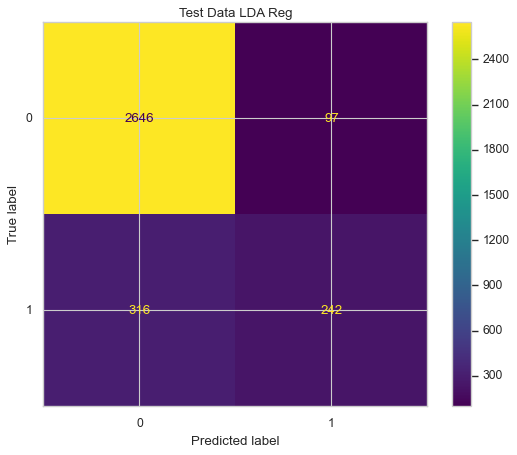

In [254]:
plot_confusion_matrix(lda,X_test,test_labels);
plt.title('Test Data LDA Reg')

AUC: 0.850


Text(0.5, 1.0, 'Test Data-LDA')

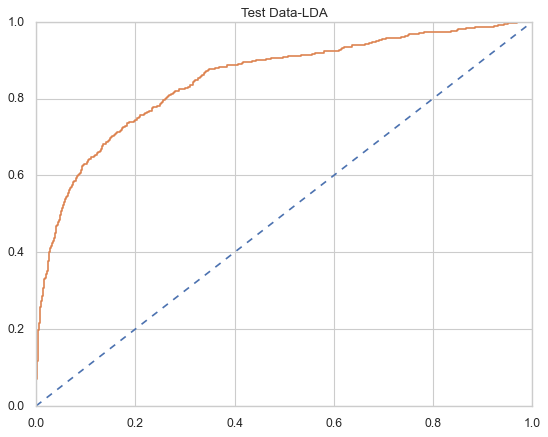

In [255]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);
plt.title('Test Data-LDA')

In [293]:
print('Classification Report of the training data LDA:\n\n',metrics.classification_report(train_labels, ytrain_predict_lda),'\n')
print('Classification Report of the test data LDA:\n\n',metrics.classification_report(test_labels, ytest_predict_lda),'\n')

Classification Report of the training data LDA:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6406
           1       0.73      0.43      0.54      1294

    accuracy                           0.88      7700
   macro avg       0.81      0.70      0.73      7700
weighted avg       0.87      0.88      0.86      7700
 

Classification Report of the test data LDA:

               precision    recall  f1-score   support

           0       0.89      0.96      0.93      2743
           1       0.71      0.43      0.54       558

    accuracy                           0.87      3301
   macro avg       0.80      0.70      0.73      3301
weighted avg       0.86      0.87      0.86      3301
 



## Applying GridSearchCV for LDA

In [257]:
grid={'shrinkage':['auto','float'],
      'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [261]:
model = LinearDiscriminantAnalysis()

In [262]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [263]:
grid_search.fit(X_train_res, train_labels_res)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'float'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]})

In [264]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [265]:
gs_lda = grid_search.best_estimator_

In [266]:
ytrain_predict_gs_lda = gs_lda.predict(X_train_res)
ytest_predict_gs_lda = gs_lda.predict(X_test)

In [ ]:
### Train Data

In [267]:
confusion_matrix(train_labels_res, ytrain_predict_gs_lda)

array([[5944,  462],
       [1189, 5217]], dtype=int64)

Text(0.5, 1.0, 'Train Data LDA Reg -GridSearch')

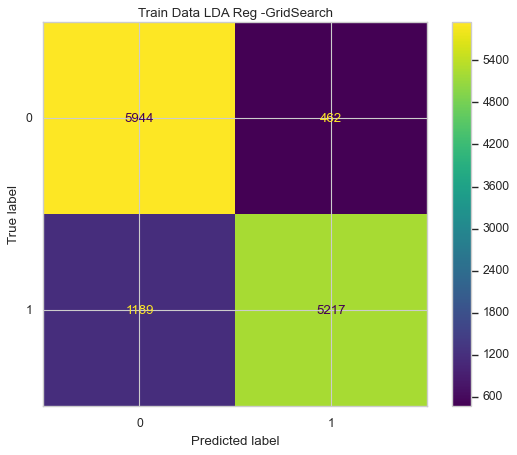

In [268]:
plot_confusion_matrix(gs_lda,X_train_res,train_labels_res);
plt.title('Train Data LDA Reg -GridSearch')

AUC: 0.941


Text(0.5, 1.0, 'Train Data LDA -GridSearch')

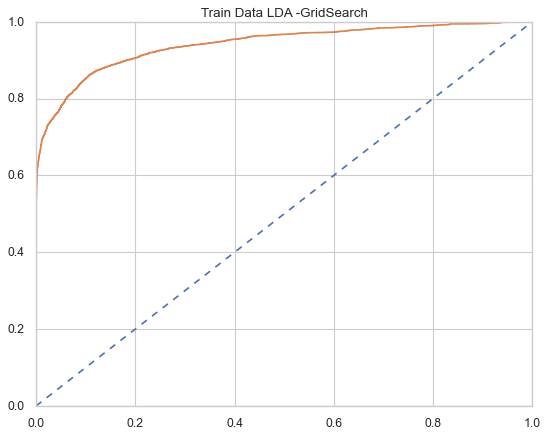

In [270]:
# predict probabilities
probs = gs_lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_lda_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % gs_lda_train_auc)
# calculate roc curve
gs_lda_train_fpr, gs_lda_train_tpr, gs_lda_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_lda_train_fpr, gs_lda_train_tpr);
plt.title('Train Data LDA -GridSearch')


In [ ]:
### Test Data

In [271]:
confusion_matrix(test_labels, ytest_predict_gs_lda)

array([[2530,  213],
       [ 248,  310]], dtype=int64)

Text(0.5, 1.0, 'Test Data LDA -GridSearch')

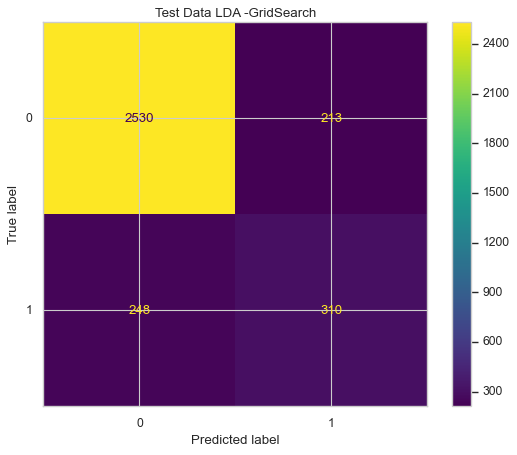

In [272]:
plot_confusion_matrix(gs_lda,X_test,test_labels);
plt.title('Test Data LDA -GridSearch')

AUC: 0.847


Text(0.5, 1.0, 'Test Data-LDA-GridSearch')

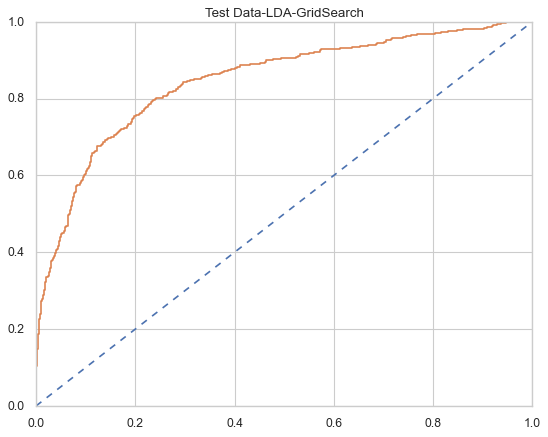

In [273]:
# predict probabilities
probs = gs_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_lda_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gs_lda_test_auc)
# calculate roc curve
gs_lda_test_fpr, gs_lda_test_tpr, gs_lda_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_lda_test_fpr, gs_lda_test_tpr);
plt.title('Test Data-LDA-GridSearch')

In [274]:
print('Classification Report of the training data GS-LDA:\n\n',metrics.classification_report(train_labels_res, ytrain_predict_gs_lda),'\n')
print('Classification Report of the test data GS-LDA:\n\n',metrics.classification_report(test_labels, ytest_predict_gs_lda),'\n')

Classification Report of the training data GS-LDA:

               precision    recall  f1-score   support

           0       0.83      0.93      0.88      6406
           1       0.92      0.81      0.86      6406

    accuracy                           0.87     12812
   macro avg       0.88      0.87      0.87     12812
weighted avg       0.88      0.87      0.87     12812
 

Classification Report of the test data GS-LDA:

               precision    recall  f1-score   support

           0       0.91      0.92      0.92      2743
           1       0.59      0.56      0.57       558

    accuracy                           0.86      3301
   macro avg       0.75      0.74      0.75      3301
weighted avg       0.86      0.86      0.86      3301
 



# KNN Classifier

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.stats import zscore

In [523]:
knn=KNeighborsClassifier()

In [286]:
X_scaled=X.apply(zscore)

In [287]:
X_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,account_segment,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,...,Payment_E wallet,Payment_UPI,Gender_Female,Gender_Male,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,Login_device_Others
0,-0.701579,1.479979,-1.341549,0.135956,-0.683005,0.090912,-0.770012,1.254313,1.61752,-1.384870,...,-0.34909,-0.279097,1.237690,-1.237690,-0.422754,-1.079607,1.491378,-0.602939,0.67908,-0.22698
1,-1.148284,-0.709243,-1.115216,0.135956,0.299311,-0.818288,-0.041708,0.580795,1.61752,-0.320921,...,-0.34909,3.582979,-0.807957,0.807957,-0.422754,-1.079607,1.491378,-0.602939,0.67908,-0.22698
2,-1.148284,-0.709243,1.374447,-1.247623,0.299311,-0.818288,-0.041708,0.244036,1.61752,-0.586908,...,-0.34909,-0.279097,-0.807957,0.807957,-0.422754,-1.079607,1.491378,-0.602939,0.67908,-0.22698
3,-1.148284,1.479979,-0.323051,-1.247623,0.299311,0.090912,1.414899,0.917554,-0.61823,1.806978,...,-0.34909,-0.279097,-0.807957,0.807957,-0.422754,-1.079607,1.491378,-0.602939,0.67908,-0.22698
4,-1.148284,-0.709243,-0.662550,-1.247623,-0.683005,-0.818288,1.414899,-0.766240,-0.61823,-1.384870,...,-0.34909,-0.279097,-0.807957,0.807957,-0.422754,-1.079607,1.491378,-0.602939,0.67908,-0.22698


In [288]:
X_train11, X_test11, train_labels11, test_labels11 = train_test_split(X_scaled, y, test_size=0.30 , random_state=1)

In [291]:
knn.fit(X_train11, train_labels11)

KNeighborsClassifier()

In [292]:
ytrain_predict_knn = knn.predict(X_train11)
ytest_predict_knn = knn.predict(X_test11)

In [ ]:
###Train data

In [294]:
confusion_matrix(train_labels11, ytrain_predict_knn)

array([[6359,   47],
       [ 167, 1127]], dtype=int64)

Text(0.5, 1.0, 'Train Data KNN')

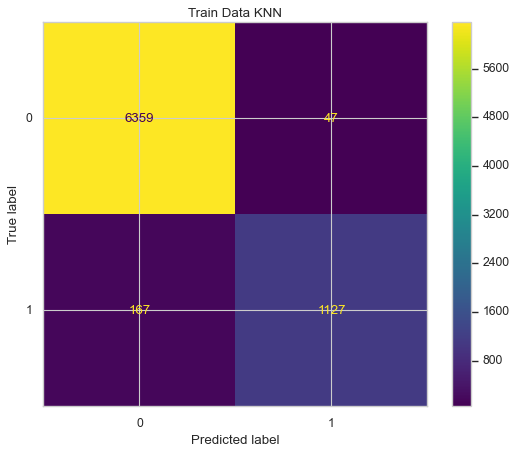

In [295]:
plot_confusion_matrix(knn,X_train11,train_labels11);
plt.title('Train Data KNN')

AUC: 0.994


Text(0.5, 1.0, 'Train Data-KNN')

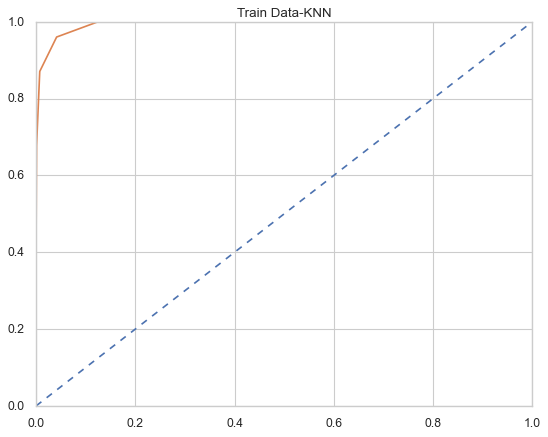

In [296]:
# predict probabilities
probs = knn.predict_proba(X_train11)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(train_labels11, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(train_labels11, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);
plt.title('Train Data-KNN')

In [ ]:
###Train data

In [297]:
confusion_matrix(test_labels11, ytest_predict_knn)

array([[2694,   49],
       [ 125,  433]], dtype=int64)

Text(0.5, 1.0, 'Test Data KNN')

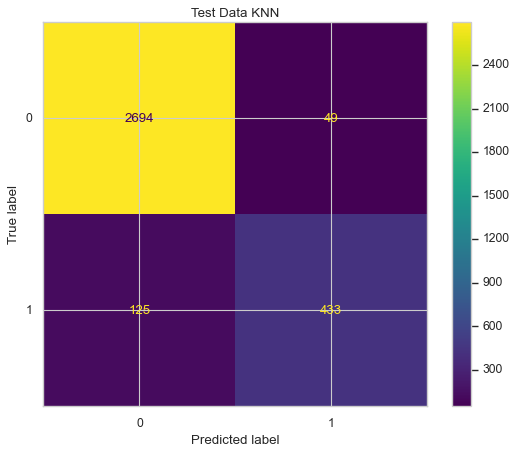

In [298]:
plot_confusion_matrix(knn,X_test11,test_labels11);
plt.title('Test Data KNN')

AUC: 0.974


Text(0.5, 1.0, 'Test Data-KNN')

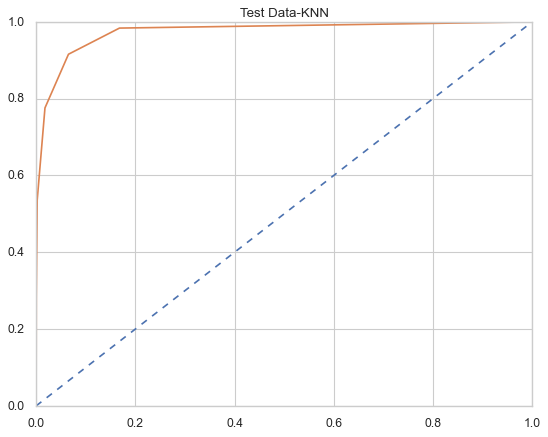

In [299]:
# predict probabilities
probs = knn.predict_proba(X_test11)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(test_labels11, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(test_labels11, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);
plt.title('Test Data-KNN')


In [525]:
print('Classification Report of the training data KNN:\n\n',metrics.classification_report(train_labels11, ytrain_predict_knn),'\n')
print('Classification Report of the test data kNN:\n\n',metrics.classification_report(test_labels11, ytest_predict_knn),'\n')

Classification Report of the training data KNN:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6406
           1       0.96      0.87      0.91      1294

    accuracy                           0.97      7700
   macro avg       0.97      0.93      0.95      7700
weighted avg       0.97      0.97      0.97      7700
 

Classification Report of the test data kNN:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97      2743
           1       0.90      0.78      0.83       558

    accuracy                           0.95      3301
   macro avg       0.93      0.88      0.90      3301
weighted avg       0.95      0.95      0.95      3301
 



## Applying GridSearchCV for KNN

In [341]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X,y)

In [342]:
X_sl=X_res.apply(zscore)

In [343]:
X_train12, X_test12, train_labels12, test_labels12 = train_test_split(X_sl, y_res, test_size=0.30 , random_state=1)

In [344]:
model = KNeighborsClassifier()

In [352]:
grid = {'n_neighbors':[5,7,9,11,13]}

In [353]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [354]:
grid_search.fit(X_train12, train_labels12)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13]})

In [355]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_neighbors': 5} 

KNeighborsClassifier()


In [356]:
gs_knn = grid_search.best_estimator_

In [357]:
ytrain_predict_gs_knn = gs_knn.predict(X_train12)
ytest_predict_gs_knn = gs_knn.predict(X_test12)

In [ ]:
###Train data

In [358]:
confusion_matrix(train_labels12, ytrain_predict_gs_knn)

array([[6242,  136],
       [ 101, 6329]], dtype=int64)

Text(0.5, 1.0, 'Train Data KNN -GridSearch')

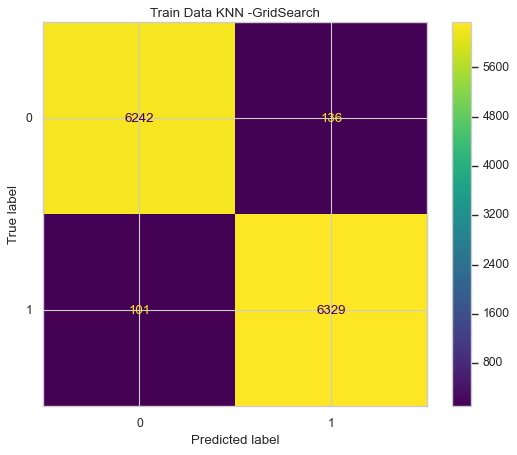

In [365]:
plot_confusion_matrix(gs_knn,X_train12,train_labels12);
plt.title('Train Data KNN -GridSearch')

AUC: 0.999


Text(0.5, 1.0, 'Train Data KNN -GridSearch')

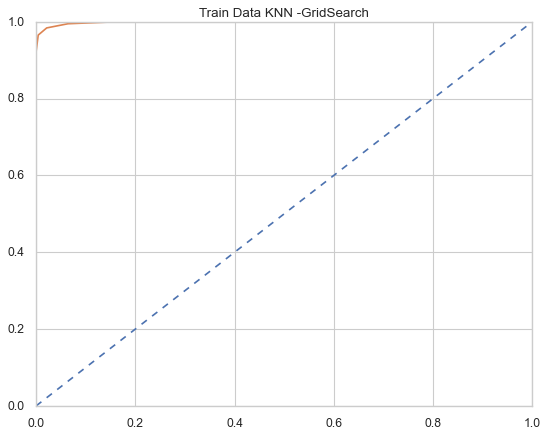

In [362]:
# predict probabilities
probs = gs_knn.predict_proba(X_train12)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_knn_train_auc = roc_auc_score(train_labels12, probs)
print('AUC: %.3f' % gs_knn_train_auc)
# calculate roc curve
gs_knn_train_fpr, gs_knn_train_tpr, gs_knn_train_thresholds = roc_curve(train_labels12, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_knn_train_fpr, gs_knn_train_tpr);
plt.title('Train Data KNN -GridSearch')

In [ ]:
###Test data

In [364]:
confusion_matrix(test_labels12, ytest_predict_gs_knn)

array([[2682,   89],
       [  75, 2644]], dtype=int64)

Text(0.5, 1.0, 'Test Data KNN -GridSearch')

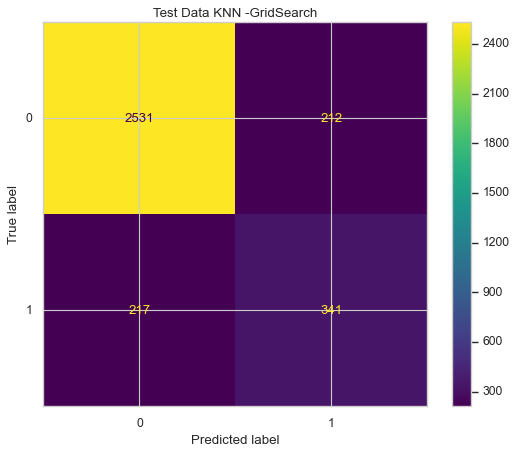

In [366]:
plot_confusion_matrix(gs_log,X_test,test_labels);
plt.title('Test Data KNN -GridSearch')

AUC: 0.995


Text(0.5, 1.0, 'Test Data-Log-GridSearch')

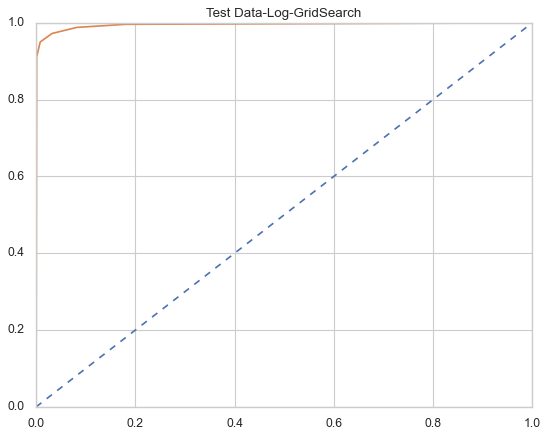

In [367]:
# predict probabilities
probs = gs_knn.predict_proba(X_test12)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_knn_test_auc = roc_auc_score(test_labels12, probs)
print('AUC: %.3f' % gs_knn_test_auc)
# calculate roc curve
gs_knn_test_fpr, gs_knn_test_tpr, gs_knn_test_thresholds = roc_curve(test_labels12, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_knn_test_fpr, gs_knn_test_tpr);
plt.title('Test Data-KNN-GridSearch')

In [413]:
print('Classification Report of the training data KNN-GS:\n\n',metrics.classification_report(train_labels12, ytrain_predict_gs_knn),'\n')
print('Classification Report of the test data KNN-GS:\n\n',metrics.classification_report(test_labels12, ytest_predict_gs_knn),'\n')

Classification Report of the training data LDA-GS:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      6378
           1       0.98      0.98      0.98      6430

    accuracy                           0.98     12808
   macro avg       0.98      0.98      0.98     12808
weighted avg       0.98      0.98      0.98     12808
 

Classification Report of the test data LDA-GS:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2771
           1       0.97      0.97      0.97      2719

    accuracy                           0.97      5490
   macro avg       0.97      0.97      0.97      5490
weighted avg       0.97      0.97      0.97      5490
 



# Decision Tree

In [369]:
dt = DecisionTreeClassifier(criterion = 'gini')

In [370]:
dt.fit(X_train, train_labels)

DecisionTreeClassifier()

In [371]:
ytrain_predict_dt = dt.predict(X_train)
ytest_predict_dt = dt.predict(X_test)

In [ ]:
##Train data

In [372]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[6406,    0],
       [   0, 1294]], dtype=int64)

Text(0.5, 1.0, 'Train Data Decision Tree')

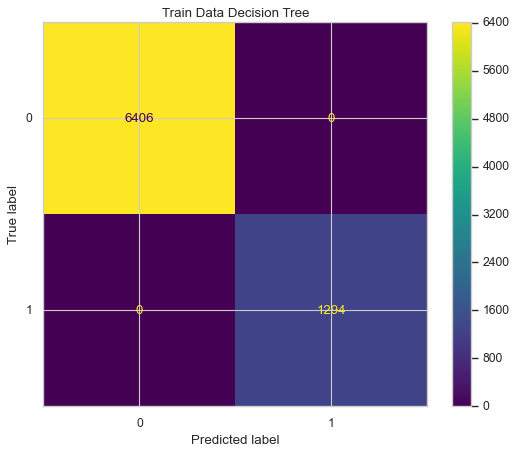

In [373]:
plot_confusion_matrix(dt,X_train,train_labels);
plt.title('Train Data Decision Tree')

AUC: 1.000


Text(0.5, 1.0, 'Train Data-Decision Tree')

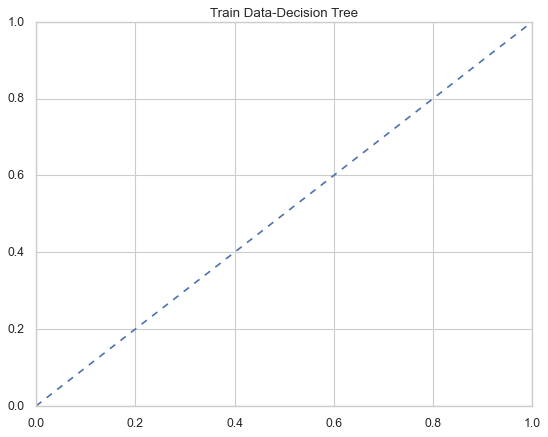

In [374]:
# predict probabilities
probs = dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr);
plt.title('Train Data-Decision Tree')

In [ ]:
##Test Data

In [375]:
confusion_matrix(test_labels, ytest_predict_dt)

array([[2655,   88],
       [  72,  486]], dtype=int64)

Text(0.5, 1.0, 'Test Data Decision Tree')

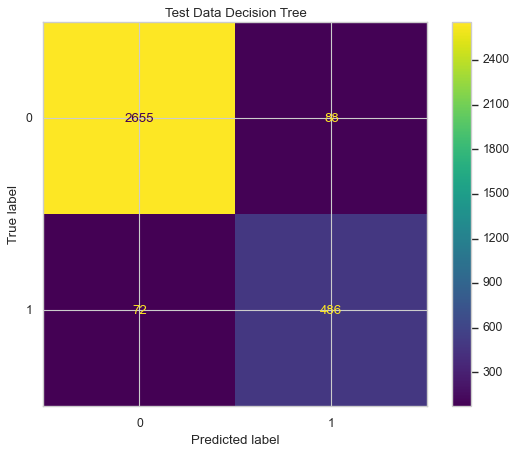

In [376]:
plot_confusion_matrix(dt,X_test,test_labels);
plt.title('Test Data Decision Tree')

AUC: 0.919


Text(0.5, 1.0, 'Test Data- Decision Tree')

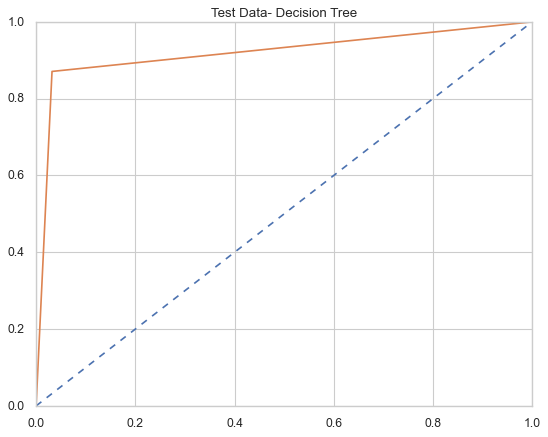

In [377]:
# predict probabilities
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr);
plt.title('Test Data- Decision Tree')

In [378]:
print('Classification Report of the training data Decision Tree:\n\n',metrics.classification_report(train_labels, ytrain_predict_dt),'\n')
print('Classification Report of the test data Decision Tree:\n\n',metrics.classification_report(test_labels, ytest_predict_dt),'\n')

Classification Report of the training data Decision Tree:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700
 

Classification Report of the test data Decision Tree:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2743
           1       0.85      0.87      0.86       558

    accuracy                           0.95      3301
   macro avg       0.91      0.92      0.91      3301
weighted avg       0.95      0.95      0.95      3301
 



In [379]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [380]:
print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.295797
CC_Agent_Score            0.084935
Day_Since_CC_connect      0.079184
rev_growth_yoy            0.066625
CC_Contacted_LY           0.058782
Complain_ly               0.056617
rev_per_month             0.050099
account_segment           0.034768
cashback                  0.029659
Login_device_Computer     0.027811
Marital_Status_Single     0.027423
Account_user_count        0.026910
City_Tier                 0.022665
Payment_Debit Card        0.020985
Payment_E wallet          0.016097
Login_device_Mobile       0.014811
coupon_used_for_payment   0.013264
Payment_Cash on Delivery  0.012192
Payment_Credit Card       0.011774
Gender_Male               0.010619
Service_Score             0.010270
Gender_Female             0.009793
Marital_Status_Married    0.007830
Payment_UPI               0.007543
Login_device_Others       0.002126
Marital_Status_Divorced   0.001421


In [ ]:
## Applying GridSearchCV for Decision Tree

In [399]:
grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [130,150, 250, 350],
    'min_samples_split': [390,450, 750, 1050]
}

In [400]:
model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [401]:
grid_search.fit(X_train_res, train_labels_res)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [130, 150, 250, 350],
                         'min_samples_split': [390, 450, 750, 1050]})

In [402]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_depth': 7, 'min_samples_leaf': 250, 'min_samples_split': 390} 

DecisionTreeClassifier(max_depth=7, min_samples_leaf=250, min_samples_split=390)


In [403]:
gs_dt = grid_search.best_estimator_

In [404]:
ytrain_predict_gs_dt = gs_dt.predict(X_train_res)
ytest_predict_gs_dt = gs_dt.predict(X_test)

In [405]:
##Train data

In [406]:
confusion_matrix(train_labels_res, ytrain_predict_gs_dt)

array([[5774,  632],
       [1234, 5172]], dtype=int64)

Text(0.5, 1.0, 'Train Data Decision Tree -GridSearch')

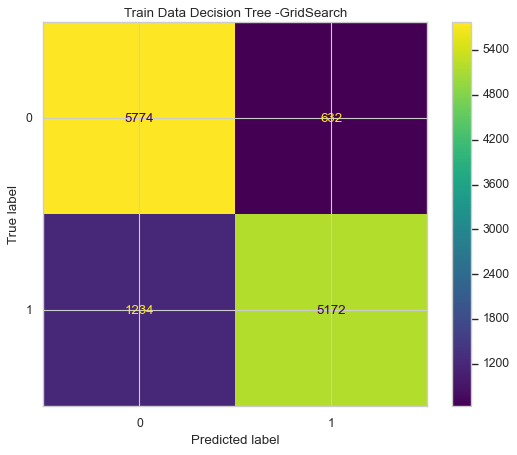

In [407]:
plot_confusion_matrix(gs_dt,X_train_res,train_labels_res);
plt.title('Train Data Decision Tree -GridSearch')

AUC: 0.934


Text(0.5, 1.0, 'Train Data Decision Tree -GridSearch')

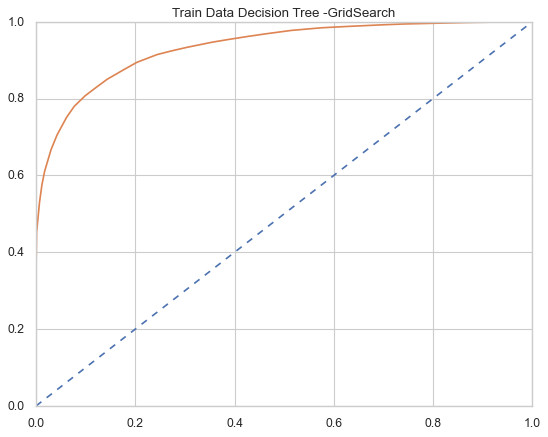

In [408]:
# predict probabilities
probs = gs_dt.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_dt_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % gs_dt_train_auc)
# calculate roc curve
gs_dt_train_fpr, gs_dt_train_tpr, gs_dt_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_dt_train_fpr, gs_dt_train_tpr);
plt.title('Train Data Decision Tree -GridSearch')

In [409]:
##Test data

In [410]:
confusion_matrix(test_labels, ytest_predict_gs_dt)

array([[2483,  260],
       [ 194,  364]], dtype=int64)

Text(0.5, 1.0, 'Test Data DecisionTree -GridSearch')

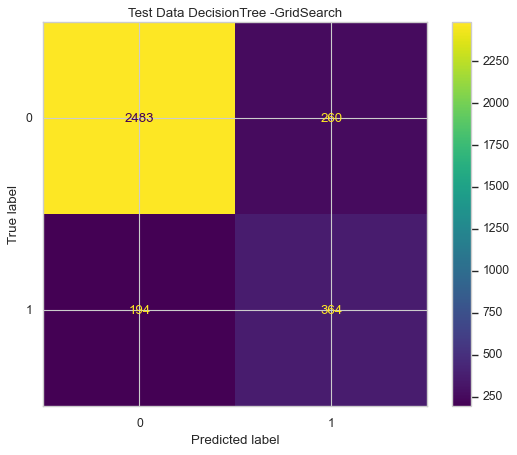

In [411]:
plot_confusion_matrix(gs_dt,X_test,test_labels);
plt.title('Test Data DecisionTree -GridSearch')

AUC: 0.856


Text(0.5, 1.0, 'Test Data-Decision Tree-GridSearch')

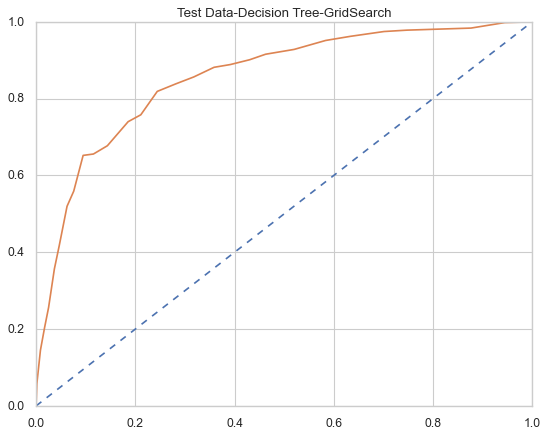

In [412]:
# predict probabilities
probs = gs_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_dt_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gs_dt_test_auc)
# calculate roc curve
gs_dt_test_fpr, gs_dt_test_tpr, gs_dt_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_dt_test_fpr, gs_dt_test_tpr);
plt.title('Test Data-Decision Tree-GridSearch')

In [414]:
print('Classification Report of the training data Decision Tree:\n\n',metrics.classification_report(train_labels_res, ytrain_predict_gs_dt),'\n')
print('Classification Report of the test data Decision Tree:\n\n',metrics.classification_report(test_labels, ytest_predict_gs_dt),'\n')

Classification Report of the training data Decision Tree:

               precision    recall  f1-score   support

           0       0.82      0.90      0.86      6406
           1       0.89      0.81      0.85      6406

    accuracy                           0.85     12812
   macro avg       0.86      0.85      0.85     12812
weighted avg       0.86      0.85      0.85     12812
 

Classification Report of the test data Decision Tree:

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2743
           1       0.58      0.65      0.62       558

    accuracy                           0.86      3301
   macro avg       0.76      0.78      0.77      3301
weighted avg       0.87      0.86      0.87      3301
 



In [415]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(gs_dt, out_file= tree_regularized , feature_names = list(X_train_res), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [416]:
print (pd.DataFrame(gs_dt.feature_importances_, columns = ["Imp"], index = X_train_res.columns).sort_values('Imp',ascending=False))

                               Imp
Tenure                    0.597902
Marital_Status_Divorced   0.190882
Marital_Status_Married    0.076706
Marital_Status_Single     0.043538
Day_Since_CC_connect      0.021476
Complain_ly               0.011464
Login_device_Mobile       0.010235
Payment_Credit Card       0.009903
rev_per_month             0.008347
CC_Agent_Score            0.007390
rev_growth_yoy            0.005154
coupon_used_for_payment   0.004720
Payment_Debit Card        0.003481
CC_Contacted_LY           0.003357
Gender_Female             0.002696
Gender_Male               0.001485
cashback                  0.001267
Login_device_Computer     0.000000
Payment_Cash on Delivery  0.000000
Payment_UPI               0.000000
Payment_E wallet          0.000000
City_Tier                 0.000000
account_segment           0.000000
Account_user_count        0.000000
Service_Score             0.000000
Login_device_Others       0.000000


# MLP Classifier (Artificial Neural Network)

In [417]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [528]:
X_trains

array([[-1.03904817,  0.39501533, -0.21313188, ..., -0.60235526,
         0.68169914, -0.23191387],
       [ 1.86898521,  1.49386577, -0.55696499, ..., -0.60235526,
         0.68169914, -0.23191387],
       [ 1.98083264, -0.70383511,  0.93297849, ..., -0.60235526,
         0.68169914, -0.23191387],
       ...,
       [-0.70350586,  1.49386577, -0.44235395, ..., -0.60235526,
         0.68169914, -0.23191387],
       [-1.03904817, -0.70383511, -0.32774291, ..., -0.60235526,
         0.68169914, -0.23191387],
       [ 2.20452752, -0.70383511, -1.35924224, ..., -0.60235526,
         0.68169914, -0.23191387]])

In [418]:
ann = MLPClassifier()

In [419]:
ann.fit(X_trains, train_labels)

MLPClassifier()

In [420]:
ytrain_predict_ann = ann.predict(X_trains)
ytest_predict_ann = ann.predict(X_tests)

In [ ]:
##Train data

In [421]:
confusion_matrix(train_labels, ytrain_predict_ann)

array([[6400,    6],
       [  19, 1275]], dtype=int64)

Text(0.5, 1.0, 'Train Data ANN')

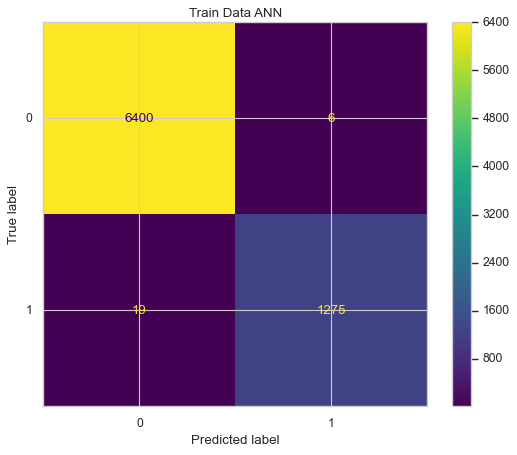

In [422]:
plot_confusion_matrix(ann,X_trains,train_labels);
plt.title('Train Data ANN')

AUC: 1.000


Text(0.5, 1.0, 'Train Data-ANN')

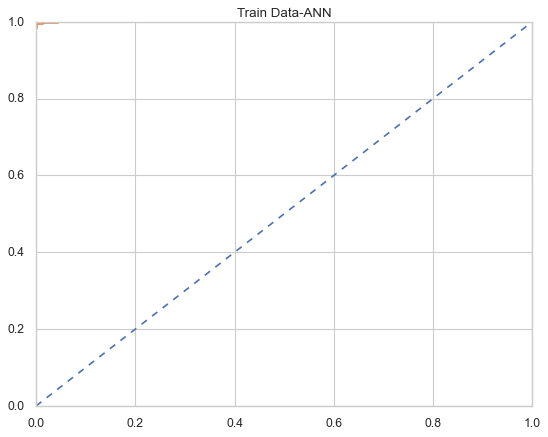

In [423]:
# predict probabilities
probs = ann.predict_proba(X_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr);
plt.title('Train Data-ANN')


In [ ]:
##Test data

In [424]:
confusion_matrix(test_labels, ytest_predict_ann)

array([[2688,   55],
       [  60,  498]], dtype=int64)

Text(0.5, 1.0, 'Test Data ANN')

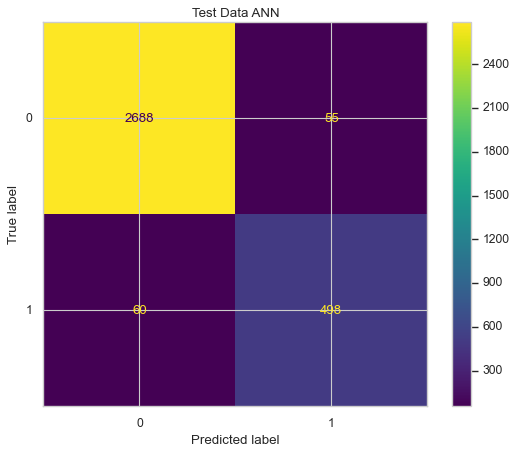

In [425]:
plot_confusion_matrix(ann,X_tests,test_labels);
plt.title('Test Data ANN')

AUC: 0.985


Text(0.5, 1.0, 'Test Data-ANN')

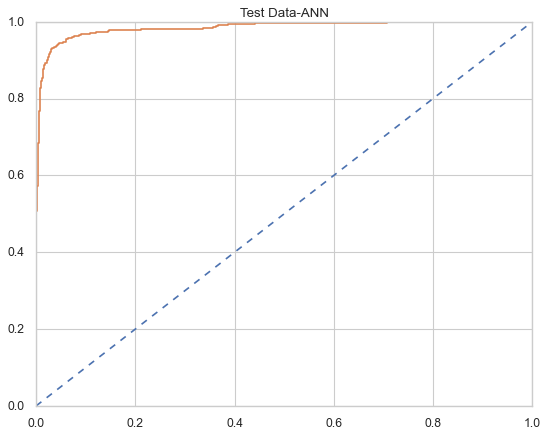

In [426]:
# predict probabilities
probs = ann.predict_proba(X_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr);
plt.title('Test Data-ANN')

In [427]:
print('Classification Report of the training data ANN:\n\n',metrics.classification_report(train_labels, ytrain_predict_ann),'\n')
print('Classification Report of the test data ANN:\n\n',metrics.classification_report(test_labels, ytest_predict_ann),'\n')

Classification Report of the training data ANN:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      0.99      0.99      1294

    accuracy                           1.00      7700
   macro avg       1.00      0.99      0.99      7700
weighted avg       1.00      1.00      1.00      7700
 

Classification Report of the test data ANN:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2743
           1       0.90      0.89      0.90       558

    accuracy                           0.97      3301
   macro avg       0.94      0.94      0.94      3301
weighted avg       0.97      0.97      0.97      3301
 



In [ ]:
## Applying GridSearchCV for Artificial Neural network

In [428]:
X_train13, X_test13, train_labels13, test_labels13 = train_test_split(X_res, y_res, test_size=0.30 , random_state=1)

In [429]:
X_trainsc = sc.fit_transform(X_train13) 
X_testsc = sc.transform (X_test13)

In [430]:
grid={'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]}

In [431]:
model = MLPClassifier()

In [432]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [433]:
grid_search.fit(X_trainsc,train_labels13)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [434]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 10000, 'solver': 'adam', 'tol': 0.01} 

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, tol=0.01)


In [442]:
gs_ann = grid_search.best_estimator_

In [443]:
ytrain_predict_gs_ann = gs_ann.predict(X_trainsc)
ytest_predict_gs_ann = gs_lda.predict(X_testsc)

In [444]:
##Train data

Text(0.5, 1.0, 'Train Data ANN -GridSearch')

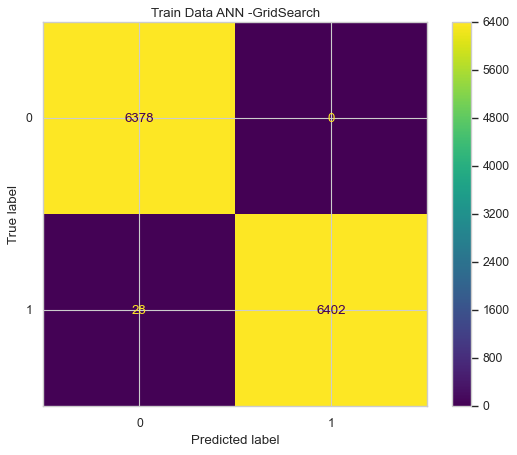

In [445]:
plot_confusion_matrix(gs_ann,X_trainsc,train_labels13);
plt.title('Train Data ANN -GridSearch')

AUC: 1.000


Text(0.5, 1.0, 'Train Data ANN -GridSearch')

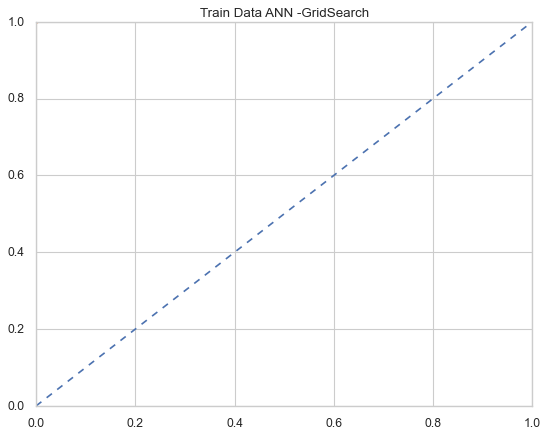

In [446]:
# predict probabilities
probs = gs_ann.predict_proba(X_trainsc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_ann_train_auc = roc_auc_score(train_labels13, probs)
print('AUC: %.3f' % gs_ann_train_auc)
# calculate roc curve
gs_ann_train_fpr, gs_ann_train_tpr, gs_ann_train_thresholds = roc_curve(train_labels13, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_ann_train_fpr, gs_ann_train_tpr);
plt.title('Train Data ANN -GridSearch')

In [447]:
##Test data

Text(0.5, 1.0, 'Test Data ANN -GridSearch')

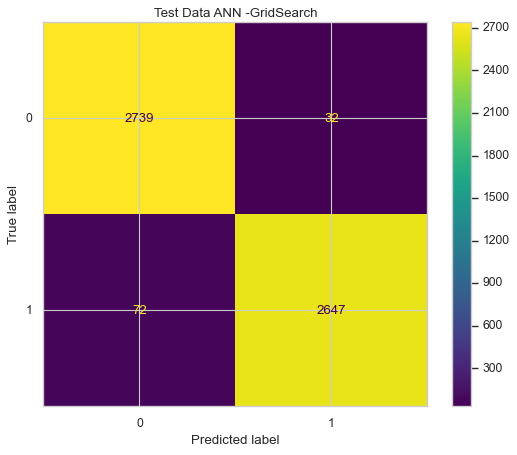

In [448]:
plot_confusion_matrix(gs_ann,X_testsc,test_labels13);
plt.title('Test Data ANN -GridSearch')

AUC: 0.997


Text(0.5, 1.0, 'Test Data-ANN-GridSearch')

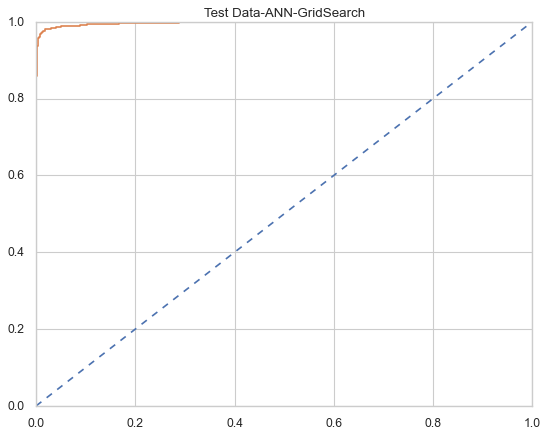

In [449]:
# predict probabilities
probs = gs_ann.predict_proba(X_testsc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_ann_test_auc = roc_auc_score(test_labels13, probs)
print('AUC: %.3f' % gs_ann_test_auc)
# calculate roc curve
gs_ann_test_fpr, gs_ann_test_tpr, gs_ann_test_thresholds = roc_curve(test_labels13, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_ann_test_fpr, gs_ann_test_tpr);
plt.title('Test Data-ANN-GridSearch')


In [450]:
print('Classification Report of the training data ANN-GS:\n\n',metrics.classification_report(train_labels13, ytrain_predict_gs_ann),'\n')
print('Classification Report of the test data ANN-GS:\n\n',metrics.classification_report(test_labels13, ytest_predict_gs_ann),'\n')

Classification Report of the training data ANN-GS:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6378
           1       1.00      1.00      1.00      6430

    accuracy                           1.00     12808
   macro avg       1.00      1.00      1.00     12808
weighted avg       1.00      1.00      1.00     12808
 

Classification Report of the test data ANN-GS:

               precision    recall  f1-score   support

           0       0.81      0.23      0.36      2771
           1       0.55      0.94      0.69      2719

    accuracy                           0.59      5490
   macro avg       0.68      0.59      0.53      5490
weighted avg       0.68      0.59      0.53      5490
 



# Random Forest Classifier 

In [452]:
from sklearn.ensemble import RandomForestClassifier

In [453]:
rf = RandomForestClassifier()

In [454]:
rf.fit(X_train, train_labels)

RandomForestClassifier()

In [455]:
ytrain_predict_rf = rf.predict(X_train)
ytest_predict_rf = rf.predict(X_test)

In [ ]:
##Train data

In [456]:
confusion_matrix(train_labels, ytrain_predict_rf)

array([[6406,    0],
       [   0, 1294]], dtype=int64)

Text(0.5, 1.0, 'Train Data Random Forest')

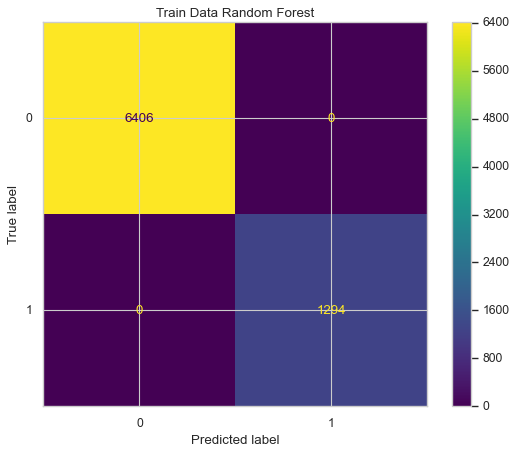

In [457]:
plot_confusion_matrix(rf,X_train,train_labels);
plt.title('Train Data Random Forest')

AUC: 1.000


Text(0.5, 1.0, 'Train Data-Random Forest')

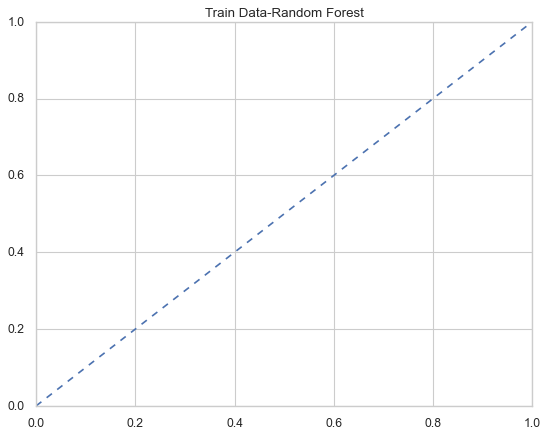

In [458]:
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr);
plt.title('Train Data-Random Forest')

In [ ]:
##Test Data

In [459]:
confusion_matrix(test_labels, ytest_predict_rf)

array([[2729,   14],
       [  83,  475]], dtype=int64)

Text(0.5, 1.0, 'Test Data Random Forest')

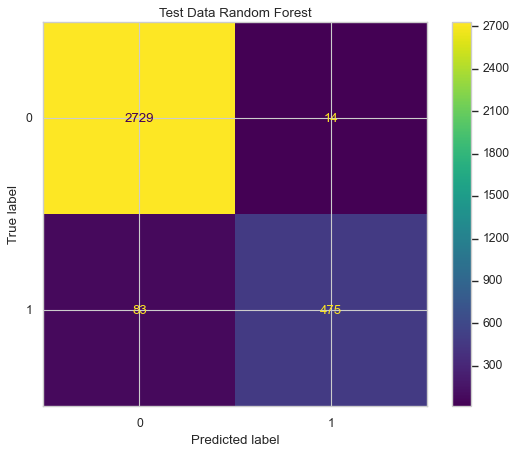

In [460]:
plot_confusion_matrix(rf,X_test,test_labels);
plt.title('Test Data Random Forest')

AUC: 0.994


Text(0.5, 1.0, 'Test Data- Random Forest')

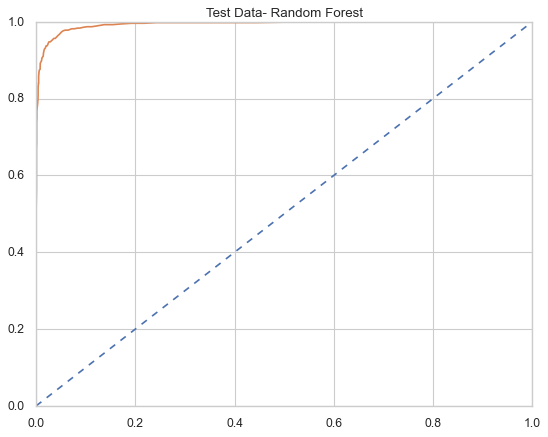

In [461]:
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr);
plt.title('Test Data- Random Forest')

In [462]:
print('Classification Report of the training data Random Forest:\n\n',metrics.classification_report(train_labels, ytrain_predict_rf),'\n')
print('Classification Report of the test data Random Forest:\n\n',metrics.classification_report(test_labels, ytest_predict_rf),'\n')

Classification Report of the training data Random Forest:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6406
           1       1.00      1.00      1.00      1294

    accuracy                           1.00      7700
   macro avg       1.00      1.00      1.00      7700
weighted avg       1.00      1.00      1.00      7700
 

Classification Report of the test data Random Forest:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2743
           1       0.97      0.85      0.91       558

    accuracy                           0.97      3301
   macro avg       0.97      0.92      0.94      3301
weighted avg       0.97      0.97      0.97      3301
 



In [ ]:
## Applying GridSearchCV for Random Forest

In [502]:
grid={
    'max_depth': [7, 8,],
    'max_features': [10, 12,],
    'min_samples_leaf': [150, 250],
    'min_samples_split': [450, 750],
    'n_estimators': [101,201,]}

In [503]:
model = RandomForestClassifier()

In [504]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [505]:
grid_search.fit(X_train_res, train_labels_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8], 'max_features': [10, 12],
                         'min_samples_leaf': [150, 250],
                         'min_samples_split': [450, 750],
                         'n_estimators': [101, 201]})

In [506]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_depth': 7, 'max_features': 12, 'min_samples_leaf': 150, 'min_samples_split': 450, 'n_estimators': 101} 

RandomForestClassifier(max_depth=7, max_features=12, min_samples_leaf=150,
                       min_samples_split=450, n_estimators=101)


In [507]:
gs_rf = grid_search.best_estimator_

In [508]:
ytrain_predict_gs_rf = gs_rf.predict(X_train_res)
ytest_predict_gs_rf = gs_rf.predict(X_test)

In [ ]:
##Train data

In [509]:
confusion_matrix(train_labels_res, ytrain_predict_gs_rf)

array([[5546,  860],
       [ 979, 5427]], dtype=int64)

Text(0.5, 1.0, 'Train Data Random Forest -GridSearch')

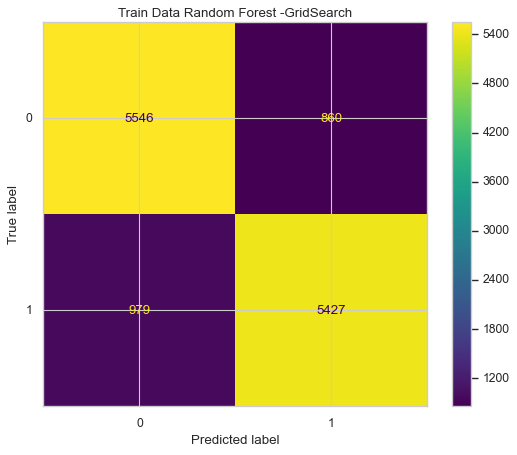

In [510]:
plot_confusion_matrix(gs_rf,X_train_res,train_labels_res);
plt.title('Train Data Random Forest -GridSearch')

AUC: 0.943


Text(0.5, 1.0, 'Train Data Random Forest -GridSearch')

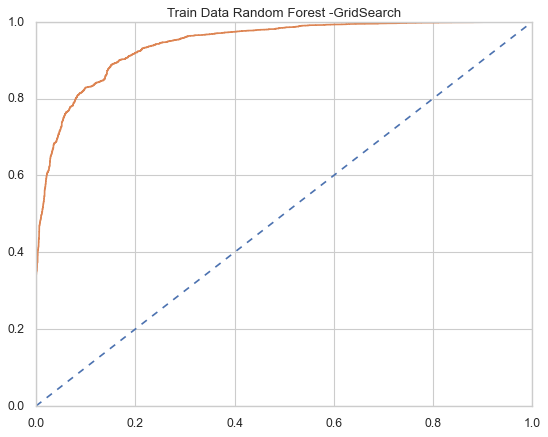

In [511]:
# predict probabilities
probs = gs_rf.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_rf_train_auc = roc_auc_score(train_labels_res, probs)
print('AUC: %.3f' % gs_rf_train_auc)
# calculate roc curve
gs_rf_train_fpr, gs_rf_train_tpr, gs_rf_train_thresholds = roc_curve(train_labels_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_rf_train_fpr, gs_rf_train_tpr);
plt.title('Train Data Random Forest -GridSearch')

In [ ]:
##Test data

In [513]:
confusion_matrix(test_labels, ytest_predict_gs_rf)

array([[2365,  378],
       [ 156,  402]], dtype=int64)

Text(0.5, 1.0, 'Test Data Random Forest-GridSearch')

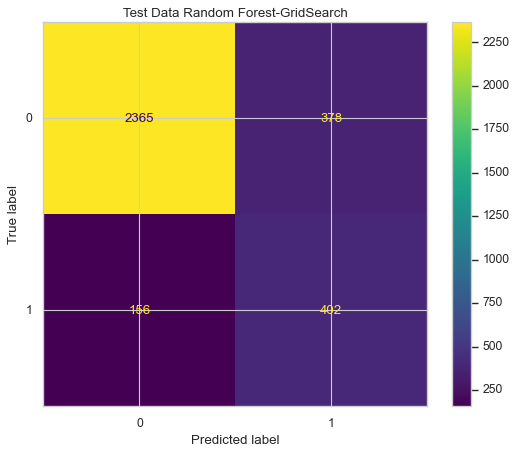

In [514]:
plot_confusion_matrix(gs_rf,X_test,test_labels);
plt.title('Test Data Random Forest-GridSearch')

AUC: 0.885


Text(0.5, 1.0, 'Test Data-Random Forest-GridSearch')

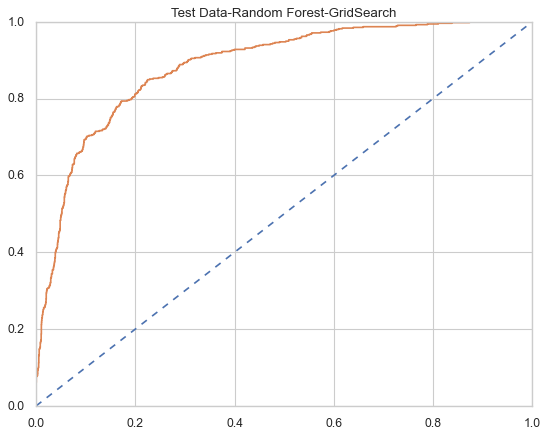

In [512]:
# predict probabilities
probs = gs_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gs_rf_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gs_rf_test_auc)
# calculate roc curve
gs_rf_test_fpr, gs_rf_test_tpr, gs_rf_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gs_rf_test_fpr, gs_rf_test_tpr);
plt.title('Test Data-Random Forest-GridSearch')

In [515]:
print('Classification Report of the training data RF-GS:\n\n',metrics.classification_report(train_labels_res, ytrain_predict_gs_rf),'\n')
print('Classification Report of the test data RF-GS:\n\n',metrics.classification_report(test_labels, ytest_predict_gs_rf),'\n')

Classification Report of the training data RF-GS:

               precision    recall  f1-score   support

           0       0.85      0.87      0.86      6406
           1       0.86      0.85      0.86      6406

    accuracy                           0.86     12812
   macro avg       0.86      0.86      0.86     12812
weighted avg       0.86      0.86      0.86     12812
 

Classification Report of the test data RF-GS:

               precision    recall  f1-score   support

           0       0.94      0.86      0.90      2743
           1       0.52      0.72      0.60       558

    accuracy                           0.84      3301
   macro avg       0.73      0.79      0.75      3301
weighted avg       0.87      0.84      0.85      3301
 



# Ensemble Learning - AdaBoosting

In [472]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=10, random_state=1)
ab.fit(X_train,train_labels)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [473]:
ytrain_predict_ab = ab.predict(X_train)
ytest_predict_ab = ab.predict(X_test)

In [474]:
##Train data

In [475]:
confusion_matrix(train_labels, ytrain_predict_ab)

array([[6141,  265],
       [ 637,  657]], dtype=int64)

Text(0.5, 1.0, 'Train Data AdaBoosting')

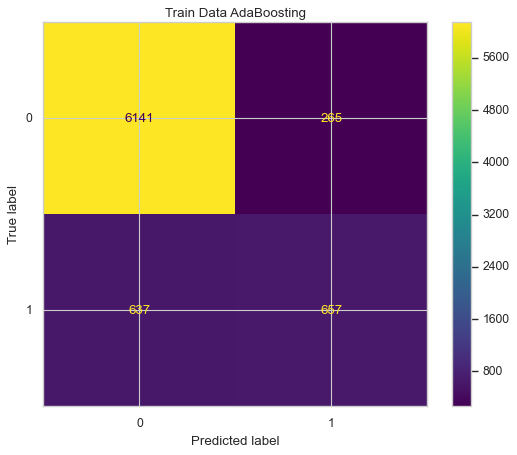

In [476]:
plot_confusion_matrix(ab,X_train,train_labels);
plt.title('Train Data AdaBoosting')

AUC: 0.891


Text(0.5, 1.0, 'Train Data-AdaBoosting')

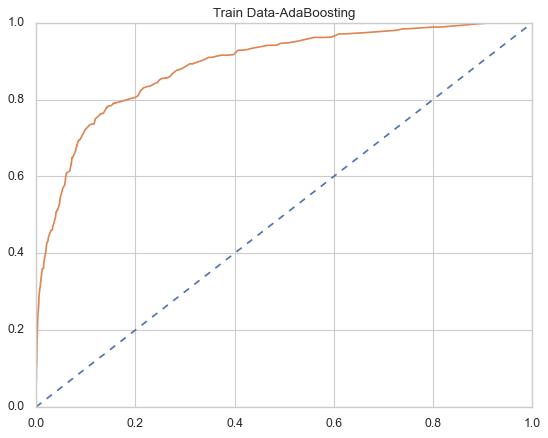

In [477]:
# predict probabilities
probs = ab.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ab_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % ab_train_auc)
# calculate roc curve
ab_train_fpr, ab_train_tpr, ab_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ab_train_fpr, ab_train_tpr);
plt.title('Train Data-AdaBoosting')

In [482]:
##Test data

In [483]:
confusion_matrix(test_labels, ytest_predict_ab)

array([[2618,  125],
       [ 260,  298]], dtype=int64)

Text(0.5, 1.0, 'Test Data AdaBoosting')

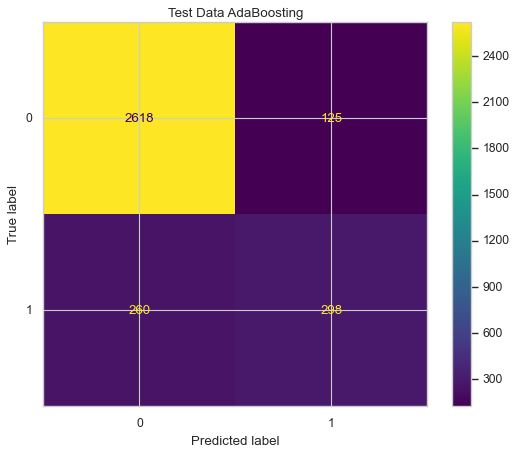

In [484]:
plot_confusion_matrix(ab,X_test,test_labels);
plt.title('Test Data AdaBoosting')

AUC: 0.881


Text(0.5, 1.0, 'Test Data- AdaBoosting')

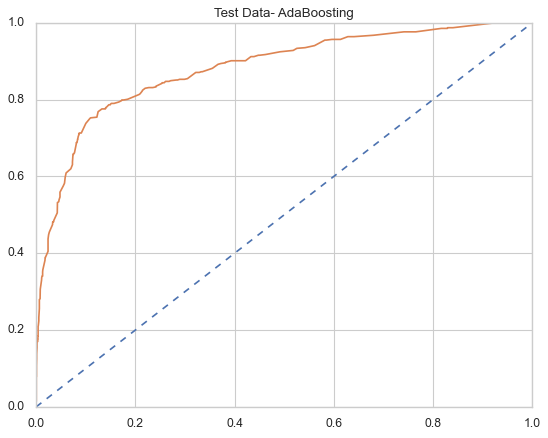

In [485]:
# predict probabilities
probs = ab.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ab_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % ab_test_auc)
# calculate roc curve
ab_test_fpr, ab_test_tpr, ab_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ab_test_fpr, ab_test_tpr);
plt.title('Test Data- AdaBoosting')


In [486]:
print('Classification Report of the training data AdaBoosting:\n\n',metrics.classification_report(train_labels, ytrain_predict_ab),'\n')
print('Classification Report of the test data AdaBoosting:\n\n',metrics.classification_report(test_labels, ytest_predict_ab),'\n')

Classification Report of the training data AdaBoosting:

               precision    recall  f1-score   support

           0       0.91      0.96      0.93      6406
           1       0.71      0.51      0.59      1294

    accuracy                           0.88      7700
   macro avg       0.81      0.73      0.76      7700
weighted avg       0.87      0.88      0.87      7700
 

Classification Report of the test data AdaBoosting:

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2743
           1       0.70      0.53      0.61       558

    accuracy                           0.88      3301
   macro avg       0.81      0.74      0.77      3301
weighted avg       0.87      0.88      0.88      3301
 



# Ensemble Learning - GradientBoost

In [488]:
from sklearn.ensemble import GradientBoostingClassifier

In [489]:
gb = GradientBoostingClassifier(n_estimators=10, random_state=1)
gb.fit(X_train,train_labels)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [490]:
ytrain_predict_gb = gb.predict(X_train)
ytest_predict_gb = gb.predict(X_test)

In [491]:
##Train data

In [492]:
confusion_matrix(train_labels, ytrain_predict_gb)

array([[6349,   57],
       [ 927,  367]], dtype=int64)

Text(0.5, 1.0, 'Train Data GradientBoosting')

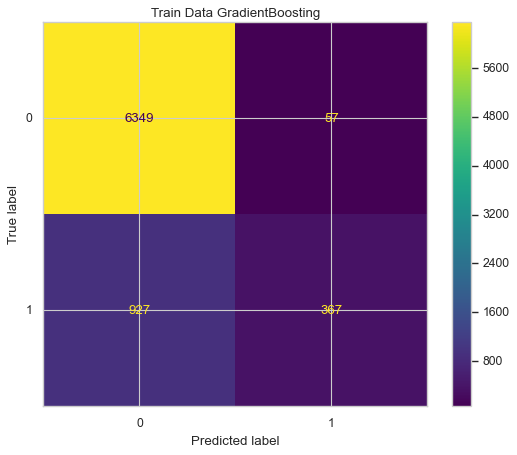

In [493]:
plot_confusion_matrix(gb,X_train,train_labels);
plt.title('Train Data GradientBoosting')

AUC: 0.884


Text(0.5, 1.0, 'Train Data-GradientBoosting')

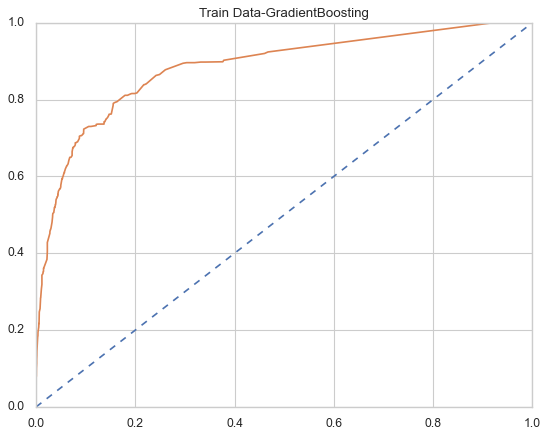

In [494]:
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_train_fpr, gb_train_tpr);
plt.title('Train Data-GradientBoosting')

In [497]:
##Test data

In [498]:
confusion_matrix(test_labels, ytest_predict_gb)

array([[2711,   32],
       [ 400,  158]], dtype=int64)

Text(0.5, 1.0, 'Test Data GradientBoosting')

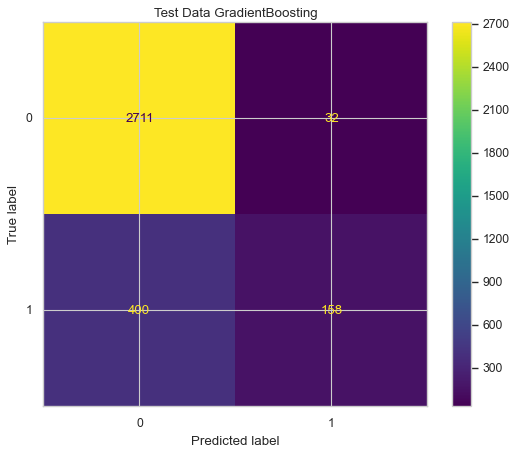

In [499]:
plot_confusion_matrix(gb,X_test,test_labels);
plt.title('Test Data GradientBoosting')

AUC: 0.873


Text(0.5, 1.0, 'Test Data- GradientBoosting')

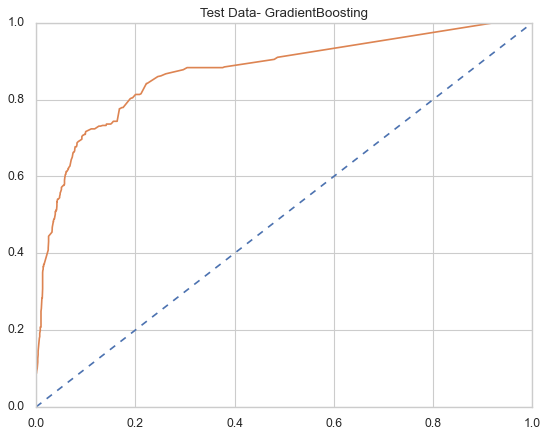

In [500]:
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
gb_test_fpr, gb_test_tpr, gb_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gb_test_fpr, gb_test_tpr);
plt.title('Test Data- GradientBoosting')

In [501]:
print('Classification Report of the training data GradientBoosting:\n\n',metrics.classification_report(train_labels, ytrain_predict_gb),'\n')
print('Classification Report of the test data GradientBoosting:\n\n',metrics.classification_report(test_labels, ytest_predict_gb),'\n')

Classification Report of the training data GradientBoosting:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      6406
           1       0.87      0.28      0.43      1294

    accuracy                           0.87      7700
   macro avg       0.87      0.64      0.68      7700
weighted avg       0.87      0.87      0.84      7700
 

Classification Report of the test data GradientBoosting:

               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2743
           1       0.83      0.28      0.42       558

    accuracy                           0.87      3301
   macro avg       0.85      0.64      0.67      3301
weighted avg       0.86      0.87      0.84      3301
 

